# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 7**

## Machine Learning: Decision Trees, Random Forests, Support Vector Machines 


Let's continue on our discussion about decision trees:

In [2]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure) 

In the last week notebook we defined a measure for how good our splits are, this measured was **Gini impurity**. Here let's use another measure for doing this task and that is called the **Entropy**. (We saw that using `skit-learn` Decision tree classifier in the last plot of last week's notebook)



## Entropy:

Entropy is a measure of information gain, in other words is a measure for the uncertainty of a random variable. When you get information you decrease the entropy. But let's define it and see how it works on different examples.

The **entropy** of a random variable $X$ with the values of ${x_i}$ and their corresponding probabilities of ${P(x_i)}$ is defined as follow:

$$
\begin{equation*}
H(X) = \sum_{i} P(x_i) \log_2(\frac{1}{P(x_i)}) = -\sum_{i} P(x_i) \log_2 P(x_i)
\end{equation*}
$$


Imagine a fair coin, the outcome of the coin is our random variable $X$, this is how much entropy our random variable has:

$$
\begin{equation*}
H(X) = -\sum_{i} P(x_i) \log_2 P(x_i) = - (0.5 \log_2 0.5 + 0.5 \log_2 0.5) = 1
\end{equation*}
$$

Which means our fair coin has **$1$ bit** of entropy. 

More generally for a **Boolean random variable** with probability of $q$ to be true, we have:

$$
\begin{equation*}
H(X) = B(q) = - (q \log_2 q + (1-q) \log_2 (1-q))
\end{equation*}
$$


If we have $p$ and $n$, positive and negative examples respectively, we can find the entropy to be:

$$
\begin{equation*}
H(X) = B(\frac{p}{n+p}) = B(\frac{n}{n+p})
\end{equation*}
$$

Now that we know haw to measure the entropy, let's find out how much information we are going to get after using a particular attribute to classify our data. Let's imagine an attribute $A$ with $k$ distinct values, which means the training set $S$ will be divided to subsets of $S_1$, ..., $S_k$. Now imagine each subset $S_i$ which contains $n_i$ negative and $p_i$ positive examples, and if do this split (creating a branch), we will still have $B(\frac{n_i}{n_i+p_i})$ bits of entropy. So if we want to answer the question we need to decrease the entropy further. We need to add the entropy for the individual subsets, by considering their weight which is the probability of choosing a random example with $i$ value of attribute $A$ from our set of examples, which gives us the following:


$$
\begin{equation*}
R(A) = \sum_{i=1}^k \frac{p_i+n_i}{p+n} B(\frac{p_i}{p_i+n_i})
\end{equation*}
$$


Therefore the resulting **information gain** based on splitting using attribute $A$ is defined as the _reduction in the entropy_:


$$
\begin{equation*}
Gain(A) = B(\frac{p}{n+p}) - R(A)
\end{equation*}
$$


Now let's code all these definitions.



In [4]:
def Entropy(prob_X):
    """
    This is the entropy function that computes 
    entropy  of a  given  random  variables  X 
    and with  their corresponding probabilities 
    p_i based on the definition in:
    
    Shanon and Weaver, 1949 
    
    -> Links to paper :
    --> http://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf
    --> https://ieeexplore.ieee.org/document/6773024
    
    
              Entropy = Σ_i p_i * log2 (p_i)
              
              
    INPUT:
    -------
            prob_X (a list/array of variables):  
       
       it should contains all the  probabilities of 
       the underlying random variable, each element
       expected to be a (0 <= float) and should
       add up to 1. (Else will be normalized)
       
       
       
    OUTPUT:
    -------
            Entropy (float): Entropy bits 
    """
    import math
    _sum_ = 0
    
    _tot_ = 0
    # checks
    for prob in prob_X:
        assert prob >= 0, "Negative probability is not accepted!!!"
        _tot_ += prob
    
#     if _tot_!=1:
#         print("Inputs are not normalized added up to {}, will be normalized!!".format(_tot_))
    
    for prob in prob_X:
        if _tot_==0:
            continue
            
        prob = prob/_tot_
        if prob == 0:
            pass
        else:
            _sum_ += prob * math.log2(prob)
        
    return abs(_sum_)


def Boolean_Entropy(q):
    """
    Finds the entropy for a Boolean random variable. 
    
    INPUT:
    ------
           q (float) : is expected to be between 0 and 1 (else AssertionError)
           
    OUTPUT:
    -------
            Entropy (float) : Entropy of a throwing a coin with chances 
                              of P(H, T) = (q, 1 - q) in bits
                              
                              
    """
    assert q >= 0 and q <= 1, "q = {} is not between [0,1]!".format(q)
        
    return Entropy([q, 1-q])


def Boolean_Entropy_counts(p, n):
    """
    Finds the entropy for a Boolean random variable. 
    
    INPUT:
    ------
           p (int or float) : Number or relative fraction of positive instances
           n (int or float) : Number or relative fraction of negative instances
           
    OUTPUT:
    -------
            Entropy (float) : Entropy of a throwing a coin with chances 
                              of P(H, T) = (q, 1 - q) in bits
                              
                              with q = p / (n + p)
                              
    """
    if n==0 and p==0:
        return 0
    q = p / (n + p)
    return Boolean_Entropy(q)

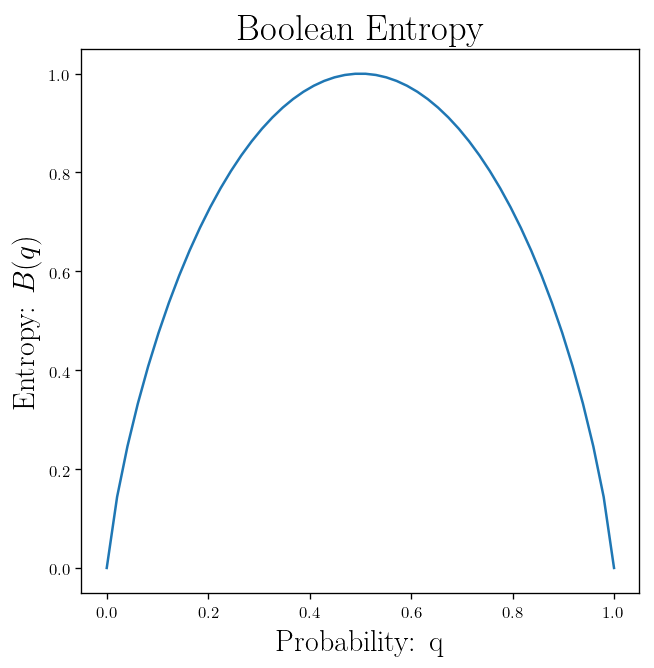

In [5]:
q_span = np.linspace(0, 1, 50)
p_span = [Boolean_Entropy(q) for q in q_span]


plt.plot(q_span, p_span,)

plt.title(r"Boolean Entropy")

plt.xlabel(r"Probability: q")
plt.ylabel(r"Entropy: $B(q)$")

plt.show()

In [6]:
def Remainder_Entropy(Attr, outcome):
    
    set_of_distinct_values = set(Attr)
    
    count_distict_values = len(set_of_distinct_values)
    count_distict_outcomes = len(set(outcome))
    
    assert count_distict_outcomes <= 2, "{} different outcomes but expected Boolean"
    
    
    count_total_positives = len([i for i in outcome if i!=0])
    count_total_negatives = len(outcome) - count_total_positives
    
    import numpy as np
    
    Attr_np = np.array(Attr)
    outcome_np = np.array(outcome)
    
    _sum_ = 0
    
    for value in set_of_distinct_values:
        _outcome_ = outcome_np[Attr_np==value]
        count_positives = len([i for i in _outcome_ if i!=0])
        count_negatives = len(_outcome_) - count_positives
        
        _entropy_ = Boolean_Entropy_counts(count_positives, count_negatives)
        _weights_ = (count_positives + count_negatives) 
        _weights_ = _weights_ / (count_total_positives + count_total_negatives)
        
        _sum_ += _weights_ * _entropy_
        
    return _sum_
        
        

def Information_Gain(Attr, outcome):
    count_total_positives = len([i for i in outcome if i!=0])
    count_total_negatives = len(outcome) - count_total_positives
    
    initial_entropy = Boolean_Entropy_counts(count_total_positives, count_total_negatives)
    remaining_entropy = Remainder_Entropy(Attr, outcome)
    
    info_gain = initial_entropy - remaining_entropy
    
    return info_gain
    

In [7]:
attr_1 = [2, 4, 1, 2, 4, 4, 5]
out__1 = [0, 0, 1, 0, 1, 1, 1]


print("The Remainder entropy is = ", Remainder_Entropy(attr_1, out__1), "bits")
print("The Information Gain is = ", Information_Gain(attr_1, out__1),  "bits")

The Remainder entropy is =  0.39355535745192405 bits
The Information Gain is =  0.5916727785823275 bits


In [8]:
attr_2 = [2, 4, 1, 2, 4, 4, 5]
out__2 = [0, 1, 1, 0, 1, 1, 1]


print("The Remainder entropy is = ", Remainder_Entropy(attr_2, out__2), "bits")
print("The Information Gain is = ", Information_Gain(attr_2, out__2),  "bits")

The Remainder entropy is =  0.0 bits
The Information Gain is =  0.863120568566631 bits


In [9]:
attr_2 = ["dog", "cat", "dog", "rabbit", "rabbit", "cat", "dog"]
out__2 = [0, 1, 1, 0, 1, 1, 1]


print("The Remainder entropy is = ", Remainder_Entropy(attr_2, out__2), "bits")
print("The Information Gain is = ", Information_Gain(attr_2, out__2),  "bits")

The Remainder entropy is =  0.6792696431662097 bits
The Information Gain is =  0.18385092540042125 bits


In [10]:
import copy
import math
import random

from statistics import mean, stdev
from collections import defaultdict

In [11]:
def euclidean_distance(X, Y):
    return math.sqrt(sum((x - y)**2 for x, y in zip(X, Y)))


def cross_entropy_loss(X, Y):
    n=len(X)
    return (-1.0/n)*sum(x*math.log(y) + (1-x)*math.log(1-y) for x, y in zip(X, Y))


def rms_error(X, Y):
    return math.sqrt(ms_error(X, Y))


def ms_error(X, Y):
    return mean((x - y)**2 for x, y in zip(X, Y))


def mean_error(X, Y):
    return mean(abs(x - y) for x, y in zip(X, Y))


def manhattan_distance(X, Y):
    return sum(abs(x - y) for x, y in zip(X, Y))


def mean_boolean_error(X, Y):
    return mean(int(x != y) for x, y in zip(X, Y))


def hamming_distance(X, Y):
    return sum(x != y for x, y in zip(X, Y))



In [12]:
def _read_data_set(data_file, skiprows=0, separator=None):
    with open(data_file, "r") as f:
        file = f.read()
        lines = file.splitlines()
        lines = lines[skiprows:]
        
    data_ = [[] for _ in range(len(lines))]
    
    for i, line in enumerate(lines):
        splitted_line = line.split(separator)
        float_line = []
        for value in splitted_line:
            try:
                value = float(value)
            except ValueError:
                if value=="":
                    continue
                else:
                    pass
            float_line.append(value)
        if float_line:
            data_[i] = float_line 
    
    for line in data_:
        if not line:
            data_.remove(line)
    
    return data_

def unique(seq):
    """
    Remove any duplicate elements from any sequence,
    works on hashable elements such as int, float,
    string, and tuple.
    """
    return list(set(seq))


def remove_all(item, seq):
    """Return a copy of seq (or string) with all occurrences of item removed."""
    if isinstance(seq, str):
        return seq.replace(item, '')
    else:
        return [x for x in seq if x != item]
    
    
def weighted_sample_with_replacement(n, seq, weights):
    """Pick n samples from seq at random, with replacement, with the
    probability of each element in proportion to its corresponding
    weight."""
    sample = weighted_sampler(seq, weights)

    return [sample() for _ in range(n)]
    

def weighted_sampler(seq, weights):
    """Return a random-sample function that picks from seq weighted by weights."""
    import bisect

    totals = []
    for w in weights:
        totals.append(w + totals[-1] if totals else w)

    return lambda: seq[bisect.bisect(totals, random.uniform(0, totals[-1]))]
    
    
def mode(data):
    import collections
    """Return the most common data item. If there are ties, return any one of them."""
    [(item, count)] = collections.Counter(data).most_common(1)
    return item

# argmin and argmax

identity = lambda x: x

argmin = min
argmax = max


def argmin_random_tie(seq, key=identity):
    """Return a minimum element of seq; break ties at random."""
    return argmin(shuffled(seq), key=key)


def argmax_random_tie(seq, key=identity):
    """Return an element with highest fn(seq[i]) score; break ties at random."""
    return argmax(shuffled(seq), key=key)


def shuffled(iterable):
    """Randomly shuffle a copy of iterable."""
    items = list(iterable)
    random.shuffle(items)
    return items

def check_equal(iterator):
    iterator = iter(iterator)
    try:
        first = next(iterator)
    except StopIteration:
        return True
    return all(first == rest for rest in iterator)

def probability(p):
    """Return true with probability p."""
    return p > random.uniform(0.0, 1.0)

In [13]:
class Data_Set:
    """
    Defining a _general_ data set class for machine learning. 
    
    These are the following fields:
    
    >> data = Data_set

    data.examples:
           
           list of examples. Each one is a list contains of attribute values.

    
    data.attributes:
    
           list of integers to index into an example, so example[attribute]
           gives a value.
    
    
    data.attribute_names:
             
           list of names for corresponding attributes.
    
    
    data.target_attribute:
    
           The target attribute for the learning algorithm.
           (Default = last attribute)
    
    
    data.input_attributes:
             
           The list of attributes without the target.
    
    
    
    data.values:
             
           It is a list of lists in which each sublist is the
           set of possible values for the corresponding attribute. 
           If initially None, it is computed from the known examples
           by self.setproblem. If not None, bad value raises ValueError.
           
           
    data.distance_measure:
                 
           A measure  of  distance  function which takes two examples
           and returns a nonnegative number. It should be a symmetric 
           function. 
           (Defaults = mean_boolean_error) : can handle any field types.
           
           
    data.file_info:
           
           This should be a tuple that contains:
        (file_address, number of rows to skip, separator)
           
           
           
    data.name:
            
           This is for naming the data set. 
    
    
    
    data.source:
    
            URL or explanation to the dataset main source
            
            
    data.excluded_attributes:
     
            List of attribute indexes to exclude from data.input_attributes.
            (indexes or names of the attributes)

    Normally, you call the constructor and you're done; then you just
    access fields like d.examples and d.target and d.inputs."""

    
    
    
    def __init__(self, examples=None, attributes=None,  attribute_names=None, 
                 target_attribute = -1,  input_attributes=None,  values=None, 
                 distance_measure = mean_boolean_error, name='',  source='', 
                 excluded_attributes=(), file_info=None):
        
        """
        Accepts any of DataSet's fields. Examples can also be a
        string or file from which to parse examples using parse_csv.
        Optional parameter: exclude, as documented in .setproblem().
        
        >>> DataSet(examples='1, 2, 3')
        <DataSet(): 1 examples, 3 attributes>
        """
        
        self.file_info = file_info
        self.name = name
        self.source = source
        self.values = values
        self.distance = distance_measure
        self.check_values_flag = bool(values)

        # Initialize examples from a list
        if examples is not None:
            self.examples = examples
        elif file_info is None:
            raise ValueError("No Examples! and No Address!")
        else:
            self.examples = _read_data_set(file_info[0], file_info[1], file_info[2])

        # Attributes are the index of examples. can be overwrite 
        if self.examples is not None and attributes is None:
            attributes = list(range(len(self.examples[0])))

        self.attributes = attributes
        
        # Initialize attribute_names from string, list, or to default
        if isinstance(attribute_names, str):
            self.attribute_names = attribute_names.split()
        else:
            self.attribute_names = attribute_names or attributes
            
        # set the definitions needed for the problem 
        self.set_problem(target_attribute, input_attributes=input_attributes, 
                         excluded_attributes=excluded_attributes)

        
        
    def get_attribute_num(self, attribute):
        if isinstance(attribute, str):
            return self.attribute_names.index(attribute)
        else:
            return attribute
        
    
    
    
    def set_problem(self, target_attribute, input_attributes=None, excluded_attributes=()):
        """
        By doing this we set the target, inputs and excluded attributes.
        
        This way, one DataSet can be used multiple ways. inputs, if specified,
        is a list of attributes, or specify exclude as a list of attributes
        to not use in inputs. Attributes can be -n .. n, or an attrname.
        Also computes the list of possible values, if that wasn't done yet."""
        
        self.target_attribute = self.get_attribute_num(target_attribute)
        
        exclude = [self.get_attribute_num(excluded) for excluded in excluded_attributes]
        
        if input_attributes:
            self.input_attributes = remove_all(self.target_attribute, input_attributes)
        else:
            inputs = []
            for a in self.attributes:
                if a != self.target_attribute and a not in exclude:
                    inputs.append(a)
            self.input_attributes = inputs

        if not self.values:
            self.update_values()
        self.sanity_check()
        
        
    def sanity_check(self):
        """Sanity check on the fields."""
        
        assert len(self.attribute_names) == len(self.attributes)
        assert self.target_attribute in self.attributes
        assert self.target_attribute not in self.input_attributes
        assert set(self.input_attributes).issubset(set(self.attributes))
        if self.check_values_flag:
            # only check if values are provided while initializing DataSet
            [self.check_example(example) for example in self.examples]
        

    def check_example(self, example):
        if self.values:
            for attr in self.attributes:
                if example[attr] not in self.values:
                    raise ValueError("Not recognized value of {} for attribute {} in {}"
                                     .format(example[attr], attr, example))
                    
                    
    def add_example(self, example):
        self.check_example(example)
        self.examples.append(example)
        
    
    def update_values(self):
        self.values = list(map(unique, zip(*self.examples)))
        
        
    def remove_examples(self, value=""):
        self.examples = [example for example in examples if value not in example]

    def sanitize(self, example):  
        """Copy of the examples with non input_attributes replaced by None"""
        _list_ = []
        for i, attr_i in enumerate(example):
            if i in self.input_attributes:
                _list_.append(attr_i)
            else:
                _list_.append(None)
        return _list_
    
    def train_test_split(self, test_fraction=0.3, Seed = 99):
        import numpy as np
        
        examples = self.examples
        atrrs = self.attributes
        atrrs_name = self.attribute_names
        target = self.target_attribute
        input_ = self.input_attributes
        name = self.name 

        np.random.seed(Seed)
        _test_index = np.random.choice(list(range(len(examples))), int(test_fraction * len(examples)), replace=False)

        test_examples = [example for i, example in enumerate(examples) if i in _test_index]

        train_examples = [example for example in examples if example not in test_examples]

        Test_data_set = Data_Set(examples=test_examples,
                                 attributes=atrrs,
                                 attribute_names=attr_names,
                                 target_attribute=target,
                                 input_attributes=input_,
                                 name=name + " Test set",)

        Train_data_set = Data_Set(examples=train_examples,
                                 attributes=atrrs,
                                 attribute_names=attr_names,
                                 target_attribute=target,
                                 input_attributes=input_,
                                 name=name + " Train set",)

        return Train_data_set, Test_data_set
                
        
    def __repr__(self):
        return '<DataSet({}): with {} examples, and {} attributes>'.format(
            self.name, len(self.examples), len(self.attributes))

        


In [14]:
class Decision_Branch:
    """
    A branch of a decision tree holds an attribute to test, and a dict
    of branches for each attribute's values.
    """

    def __init__(self, attribute, attribute_name=None, default_child=None, branches=None):
        """Initialize by specifying what attribute this node tests."""
        
        self.attribute = attribute
        self.attribute_name = attribute_name or attribute
        self.default_child = default_child
        self.branches = branches or {}

    def __call__(self, example):
        """Classify a given example using the attribute and the branches."""
        attribute_val = example[self.attribute]
        if attribute_val in self.branches:
            return self.branches[attribute_val](example)
        else:
            # return default class when attribute is unknown
            return self.default_child(example)

    def add(self, value, subtree):
        """Add a branch.  If self.attribute = value, move to the given subtree."""
        self.branches[value] = subtree

    def display_out(self, indent=0):
        name = self.attribute_name
        print("Test", name)
        for value, subtree in self.branches.items():
            print(" " * indent * 5, name, '=', value, "--->", end=" ")
            subtree.display_out(indent + 1)
        # New line
        print()

    def __repr__(self):
        return ('Decision_Branch({}, {}, {})'
                .format(self.attribute, self.attribute_name, self.branches))

In [15]:
class Decision_Leaf:
    """A simple leaf class for a decision tree that hold a result."""

    def __init__(self, result):
        self.result = result

    def __call__(self, example):
        return self.result

    def display_out(self, indent=0):
        print('RESULT =', self.result)

    def __repr__(self):
        return repr(self.result)

In [16]:
def Decision_Tree_Learner(dataset):
    """
    Learning Algorithm for a Decision Tree
    """

    target, values = dataset.target_attribute, dataset.values

    def decision_tree_learning(examples, attrs, parent_examples=()):
        if not examples:
            return plurality(parent_examples)
        elif same_class_for_all(examples):
            return Decision_Leaf(examples[0][target])
        elif not attrs:
            return plurality(examples)
        else:
            A = choose_important_attribute(attrs, examples)
            tree = Decision_Branch(A, dataset.attribute_names[A], plurality(examples))
            
            for (vk, exs) in split_by(A, examples):
                subtree = decision_tree_learning(
                    exs, remove_all(A, attrs), examples)
                tree.add(vk, subtree)
            return tree

    def plurality(examples):
        """Return the most occured target value for this set of examples.
        (If binary target this is the majority, otherwise plurality)"""
        most_occured = argmax_random_tie(values[target],
                                    key=lambda v: count_example_same_attr(target, v, examples))
        return Decision_Leaf(most_occured)

    def count_example_same_attr(attr, val, examples):
        """Count the number of examples that have example[attr] = val."""
        return sum(e[attr] == val for e in examples)

    def same_class_for_all(examples):
        """Are all these examples in the same target class?"""
        _class_ = examples[0][target]
        return all(example[target] == _class_ for example in examples)

    def choose_important_attribute(attrs, examples):
        """Choose the attribute with the highest information gain."""
        return argmax_random_tie(attrs,
                                 key=lambda a: information_gain(a, examples))

    def information_gain(attr, examples):
        """Return the expected reduction in entropy from splitting by attr."""
        def _entropy_(examples):
            count = []
            for val in values[target]:
                count.append(count_example_same_attr(target, val, examples))
            return Entropy(count)
        
        N = len(examples)
        remainder = sum((len(examples_i)/N) * _entropy_(examples_i)
                        for (v, examples_i) in split_by(attr, examples))
        return _entropy_(examples) - remainder

    def split_by(attr, examples):
        """Return a list of (val, examples) pairs for each val of attr."""
        return [(v, [e for e in examples if e[attr] == v])
                for v in values[attr]]

    return decision_tree_learning(dataset.examples, dataset.input_attributes)

In [17]:
def Random_Forest(dataset, n=5, verbose=False):
    """
    An ensemble of Decision Trees trained using bagging and feature bagging.
    
    bagging: Bootstrap aggregating
    """

    def data_bagging(dataset, m=0):
        """Sample m examples with replacement"""
        n = len(dataset.examples)
        return weighted_sample_with_replacement(m or n, dataset.examples, [1]*n)

    def feature_bagging(dataset, p=0.7):
        """Feature bagging with probability p to retain an attribute"""
        inputs = [i for i in dataset.input_attributes if probability(p)]
        return inputs or dataset.input_attributes

    def predict(example):
        if verbose:
            print([predictor(example) for predictor in predictors])
        return mode(predictor(example) for predictor in predictors)

    predictors = [Decision_Tree_Learner(Data_Set(examples=data_bagging(dataset),
                                                 attributes=dataset.attributes,
                                                 attribute_names=dataset.attribute_names,
                                                 target_attribute=dataset.target_attribute,
                                                 input_attributes=feature_bagging(dataset))) for _ in range(n)]

    return predict


In [18]:
address = "iris.data"
attribute_names = ["sepal-lenght", "sepal-width", "petal-lenght", "petal-width", "class"]
Iris_Data = Data_Set(name = "Iris", target_attribute=4,
                     file_info=(address, 0, ","), attribute_names=attribute_names)

In [19]:
Iris_Data.examples[-4:]

[[6.3, 2.5, 5.0, 1.9, 'Iris-virginica'],
 [6.5, 3.0, 5.2, 2.0, 'Iris-virginica'],
 [6.2, 3.4, 5.4, 2.3, 'Iris-virginica'],
 [5.9, 3.0, 5.1, 1.8, 'Iris-virginica']]

In [20]:
TREE = Decision_Tree_Learner(Iris_Data)

In [21]:
TREE.display_out()

Test petal-lenght
 petal-lenght = 1.7 ---> RESULT = Iris-setosa
 petal-lenght = 1.4 ---> RESULT = Iris-setosa
 petal-lenght = 1.6 ---> RESULT = Iris-setosa
 petal-lenght = 1.3 ---> RESULT = Iris-setosa
 petal-lenght = 1.5 ---> RESULT = Iris-setosa
 petal-lenght = 1.1 ---> RESULT = Iris-setosa
 petal-lenght = 1.2 ---> RESULT = Iris-setosa
 petal-lenght = 1.0 ---> RESULT = Iris-setosa
 petal-lenght = 1.9 ---> RESULT = Iris-setosa
 petal-lenght = 4.7 ---> RESULT = Iris-versicolor
 petal-lenght = 4.5 ---> Test sepal-lenght
      sepal-lenght = 4.7 ---> RESULT = Iris-versicolor
      sepal-lenght = 5.5 ---> RESULT = Iris-versicolor
      sepal-lenght = 5.0 ---> RESULT = Iris-versicolor
      sepal-lenght = 4.9 ---> RESULT = Iris-virginica
      sepal-lenght = 5.1 ---> RESULT = Iris-versicolor
      sepal-lenght = 4.6 ---> RESULT = Iris-versicolor
      sepal-lenght = 5.4 ---> RESULT = Iris-versicolor
      sepal-lenght = 4.4 ---> RESULT = Iris-versicolor
      sepal-lenght = 4.8 ---> RESULT

In [22]:
f = Random_Forest(Iris_Data, n = 1000)

In [23]:
Iris_Data.examples[0]

[5.1, 3.5, 1.4, 0.2, 'Iris-setosa']

In [24]:
Iris_Data_cp = Iris_Data

In [25]:
Iris_Data_cp.examples[:3]

[[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
 [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
 [4.7, 3.2, 1.3, 0.2, 'Iris-setosa']]

In [26]:
def _find_the_class_(e, classes):
    number_of_classes = len(classes)
    for i in range(number_of_classes):
        try:
            if e <= classes[i+1] and e>= classes[i]:
                e = (classes[i]+classes[i+1])/2
        except IndexError:
            pass
    return e
    

Iris_Data_cp = Iris_Data

m = 3
indices = [0, 1, 2, 3]


for e in Iris_Data_cp.examples:
    for index in indices:
        min_v = min(Iris_Data_cp.values[index])
        max_v = max(Iris_Data_cp.values[index])
        
        splits = [(min_v + (max_v - min_v) * i / m) for i in range(m+1)]
        e[index] = _find_the_class_(e[index], splits)
    


In [27]:
Iris_Data_cp.update_values()

In [28]:
Iris_Data_cp.values

[[4.9, 6.1, 7.300000000000001],
 [2.4000000000000004, 3.2, 4.0],
 [1.9833333333333334, 3.95, 5.916666666666668],
 [0.49999999999999994, 1.2999999999999998, 2.1],
 ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']]

In [29]:
_new_tree_ = Decision_Tree_Learner(Iris_Data_cp)

In [30]:
_new_tree_.display_out()

Test petal-width
 petal-width = 0.49999999999999994 ---> RESULT = Iris-setosa
 petal-width = 1.2999999999999998 ---> Test petal-lenght
      petal-lenght = 1.9833333333333334 ---> RESULT = Iris-versicolor
      petal-lenght = 3.95 ---> Test sepal-lenght
           sepal-lenght = 4.9 ---> Test sepal-width
                sepal-width = 2.4000000000000004 ---> RESULT = Iris-versicolor
                sepal-width = 3.2 ---> RESULT = Iris-versicolor
                sepal-width = 4.0 ---> RESULT = Iris-versicolor

           sepal-lenght = 6.1 ---> RESULT = Iris-versicolor
           sepal-lenght = 7.300000000000001 ---> RESULT = Iris-versicolor

      petal-lenght = 5.916666666666668 ---> Test sepal-lenght
           sepal-lenght = 4.9 ---> RESULT = Iris-virginica
           sepal-lenght = 6.1 ---> Test sepal-width
                sepal-width = 2.4000000000000004 ---> RESULT = Iris-virginica
                sepal-width = 3.2 ---> RESULT = Iris-versicolor
                sepal-width = 4.0 --

In [31]:
f = Random_Forest(Iris_Data_cp, n=50)

In [32]:
f(Iris_Data.examples[2])

'Iris-setosa'

In [33]:
Iris_Data.examples[2]

[4.9, 3.2, 1.9833333333333334, 0.49999999999999994, 'Iris-setosa']

As you can see our **Random Forest** algorithm seems to work fine. Now let's apply it on another data set. This is a **Breast Cancer Data set**:

 Attribute Information for the data-set:
 
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
   10. irradiat:yes, no.

In [34]:
breast_cancer_data = "/home/abtin/Documents/courses/machine_learning/spring_2019/Foundation_applied_machine_learning/notebooks/week7/breast-cancer.data"

In [35]:
attr_names = ["Class", "Age", "Menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"]

In [36]:
BC_dataset = Data_Set(name = "Breast Cancer dataset", 
                      target_attribute=9,
                      attribute_names=attr_names,
                      file_info=(breast_cancer_data, None, ","))

In [37]:
tree_BC = Decision_Tree_Learner(BC_dataset)

In [38]:
tree_BC.display_out()

Test inv-nodes
 inv-nodes = 6-8 ---> Test tumor-size
      tumor-size = 5-9 ---> RESULT = yes
      tumor-size = 45-49 ---> RESULT = no
      tumor-size = 30-34 ---> Test breast-quad
           breast-quad = right_low ---> Test deg-malig
                deg-malig = 1.0 ---> RESULT = yes
                deg-malig = 2.0 ---> RESULT = yes
                deg-malig = 3.0 ---> RESULT = no

           breast-quad = right_up ---> RESULT = no
           breast-quad = left_up ---> RESULT = no
           breast-quad = ? ---> RESULT = no
           breast-quad = left_low ---> RESULT = no
           breast-quad = central ---> RESULT = no

      tumor-size = 50-54 ---> RESULT = yes
      tumor-size = 15-19 ---> RESULT = yes
      tumor-size = 20-24 ---> RESULT = yes
      tumor-size = 35-39 ---> RESULT = no
      tumor-size = 40-44 ---> RESULT = yes
      tumor-size = 0-4 ---> RESULT = yes
      tumor-size = 25-29 ---> RESULT = yes
      tumor-size = 10-14 ---> RESULT = yes

 inv-nodes = 3-5 ---> T

In [39]:
BC_Train, BC_test = BC_dataset.train_test_split(test_fraction=0.2, Seed=90)

In [40]:
RF_BC = Random_Forest(BC_Train, n = 100)

In [41]:
def Measure_accuracy(true_values, predictions):
    _sum_ = 0
    for truth, prediction in zip(true_values, predictions):
        if truth==prediction:
            _sum_+=1
    return _sum_/len(predictions)

In [42]:
rf_pridictions = [RF_BC(a[:-1]) for a in BC_test.examples]
true_Test_values = [example[BC_test.target_attribute] for example in BC_test.examples]

Measure_accuracy(true_Test_values, rf_pridictions)

0.7017543859649122

In [43]:
def plot_the_accuracy(train_set, test_set, list_of_tree_num = np.arange(10, 100, 10)):
    accuracy =[]
    for n in list_of_tree_num:
        RF_BC = Random_Forest(train_set, n=n)
        _predictions = [RF_BC(a[:-1]) for a in test_set.examples]
        _true_values = [example[test_set.target_attribute] for example in test_set.examples]
        accuracy.append(Measure_accuracy(_true_values, _predictions))
                        
    fig = plt.plot(list_of_tree_num, accuracy)
    return fig, accuracy

Can take a long time!

Text(0, 0.5, 'Accuracy')

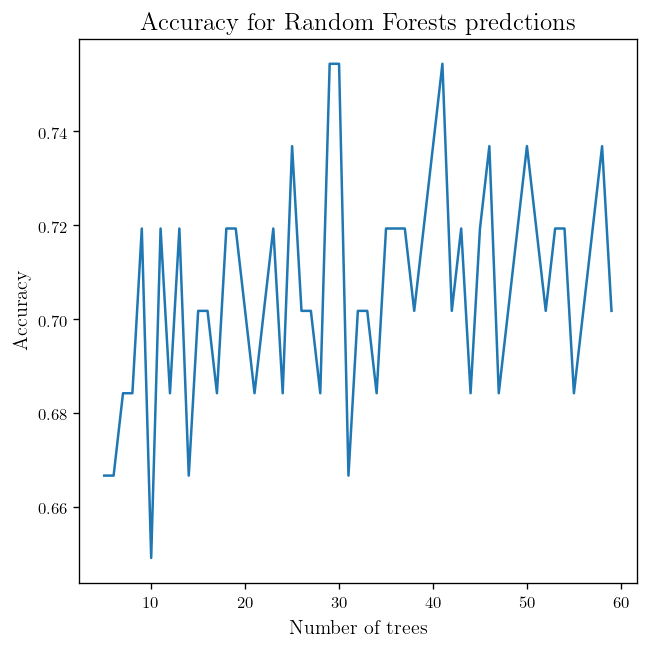

In [47]:
acc, fig = plot_the_accuracy(BC_Train, BC_test, list(range(5, 60)))

plt.title(r"Accuracy for Random Forests predctions", fontsize=15)
plt.xlabel(r"Number of trees", fontsize=12)
plt.ylabel(r"Accuracy", fontsize=12)

And as you can adding to the number of trees can improve the accuracy but not in a significant way.

In [44]:
_Train, _Test = BC_dataset.train_test_split(test_fraction=0.2, Seed=10)

print(_Train.examples[1])
print(_Test.examples[1])


_Train, _Test = BC_dataset.train_test_split(test_fraction=0.2, Seed=10)

print("\n")
print(_Train.examples[1])
print(_Test.examples[1])

['no-recurrence-events', '40-49', 'premeno', '20-24', '0-2', 'no', 2.0, 'right', 'right_up', 'no']
['no-recurrence-events', '50-59', 'ge40', '30-34', '0-2', 'no', 1.0, 'right', 'right_up', 'no']


['no-recurrence-events', '40-49', 'premeno', '20-24', '0-2', 'no', 2.0, 'right', 'right_up', 'no']
['no-recurrence-events', '50-59', 'ge40', '30-34', '0-2', 'no', 1.0, 'right', 'right_up', 'no']


In [45]:
def plot_learning(dataset, list_of_train_frac = np.arange(0.01, 1, 0.05), n_trees = 10):
    accuracy = []
    import time
    for i in list_of_train_frac:
        _Train, _Test = dataset.train_test_split(test_fraction=1-i, Seed=10)
        RF_BC = Random_Forest(_Train, n=n_trees)
        _pridictions = [RF_BC(a[:-1]) for a in _Test.examples]
        _true_values = [example[_Test.target_attribute] for example in _Test.examples]
        accuracy.append(Measure_accuracy(_true_values, _pridictions))
    fig = plt.plot(list_of_train_frac, accuracy)
    return fig, accuracy

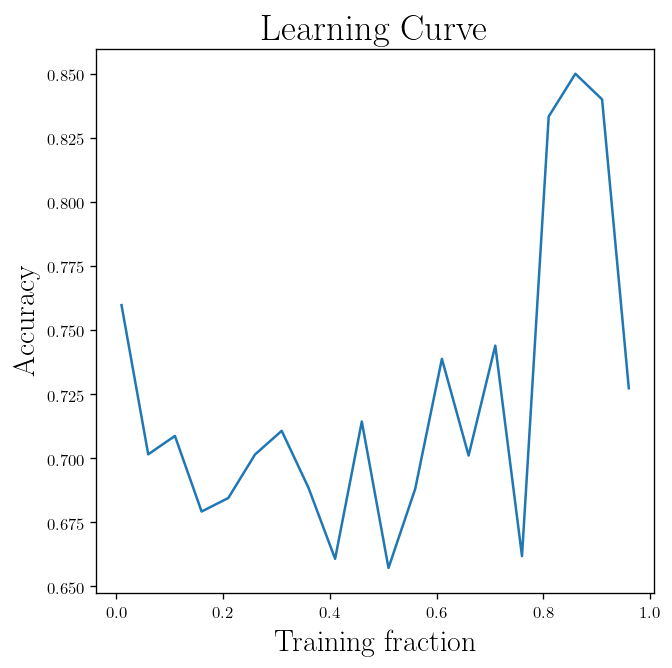

In [46]:
fig, acc = plot_learning(BC_dataset)

plt.title(r"Learning Curve")
plt.ylabel(r"Accuracy")
plt.xlabel(r"Training fraction")

plt.show()

# Kernel Method:
_(Heavily based on the Andrew Ng lecture notes as well as the chapter 18 on Artificial Intelligent: A modern approach by Russell And Norvig)_

In this section we are going to work with another method for a classification task (can be generalized to regression) which is one of the best algorithms to use when you have not a lot a of information about the data. Like any other algorithms it should be used wisely, however, it can work fairly well as a _"top-the-shelf"_ learning algorithm.

But first let's talk about a more general class of **Pattern Analysis** called **Kernel Method**



Let's go back to our method to find a polynomial fit (order $p$), or more generally when the linear model is insufficient on capturing all the useful patterns in our data:
$$
\begin{equation*}
y = \sum_{i=0}^p w_i x^i 
\end{equation*}
$$

We can rewrite this using an addition function $\psi: \mathbb{R} \rightarrow \mathbb{R}^p$:

$$
\begin{equation*}
\psi(x) = 
\begin{pmatrix}
1\\
x\\
x^2\\
\vdots\\
x^p
\end{pmatrix} \in \mathbb{R}^p
\end{equation*}
$$

This is how the equation will look like after using $\psi$:

$$
\begin{equation*}
y = \sum_{i=0}^p w_i x^i = w^T \psi(x) 
\end{equation*}
$$

This actually look like the linear model that we know how to solve and discuss several algorithms based on the **gradient descent**. The input variables of the problem $x$ is the input **attributes** and the output quantity is the **Feature** variables. Therefore, $\psi$ maps attributes to features and is called **feature map**.


Now imagine that we have a feature map $\psi: \mathbb{R}^n \rightarrow \mathbb{R}^q$, in which we have a set of $n$ attributes and we are mapping that to $q$ features.

Our goal here is to find the function $w^T \psi(x)$, but here we have $q$ $w_i$ to find instead of the usual $n$ which was the number of the attributes. So, it means we need to find the optimal solution for the corresponding weights in the $\mathbb{R}^q$ instead of $\mathbb{R}^n$. Let's take a look at our previously discussed gradient descent algorithm which gave us this for how to update the weights:

$$
\begin{equation*}
\frac{\partial L_2}{\partial w_i} = \frac{2}{N} \sum_{j=1}^N (\vec{X_j}.\vec{w} - y_j) X_{j,i}\\
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(\vec{w})}
\end{equation*}
$$

Now it will become:
$$
\begin{equation*}
\frac{\partial L_2}{\partial w_i} = \frac{2}{N} \sum_{j=1}^N (\vec{\psi}(X_j).\vec{w} - y_j) \psi(X_{j,i})\\
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(\vec{w})} =
\begin{pmatrix}
\frac{\partial L_2}{\partial w_1}\\
\frac{\partial L_2}{\partial w_2}\\
\vdots\\
\frac{\partial L_2}{\partial w_q}
\end{pmatrix}
\end{equation*}
$$

And $\vec{\psi}(X_{j})$ simply means:
$$
\begin{equation*}
\vec{\psi}(X_{j}) =
\begin{pmatrix}
\psi(X_{j,1})\\
\psi(X_{j,2})\\
\vdots\\
\psi(X_{j,n})
\end{pmatrix}
\end{equation*}
$$

And it belongs to $\mathbb{R}^q$

This is the update based on the entire data set (Batch gradient descent), we can redefine the the update for stochastic gradient descent which was: (Here we have $\vec{w} \in \mathbb{R}^n$)

$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(X_j, y_j, \vec{w})}
\end{equation*}
$$

Into:
$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(\vec{\psi}(X_j), y_j, \vec{w})}
\end{equation*}
$$

In which $\vec{w} \in \mathbb{R}^q$. If we are using a feature map of order $p$ and if we consider all the monomials of $X_j$ we are going to have a $\psi$ that look like this:

$$
\begin{equation*}
\vec{\psi}(X_{j}) =
\begin{pmatrix}
1\\
X_{j,1}\\
X_{j,2}\\
\vdots\\
X_{j,1}^2\\
X_{j,1} X_{j,2}\\
X_{j,1} X_{j,3}\\
\vdots\\
X_{j,1}^3\\
X_{j,1}^2 X_{j,2}\\
X_{j,1}^2 X_{j,3}\\
\vdots
\end{pmatrix}
\end{equation*}
$$

If we count them we have $1$, $0^{th}$ order term, we have $n$, $1^{th}$ order terms, $\binom{n+2-1}{2}$, $2^{th}$ order terms and so on: (Using the famous [star and bar argument](https://en.wikipedia.org/wiki/Stars_and_bars_(combinatorics)))

$$
\begin{equation*}
q = \binom{n}{0} + \binom{n+1-1}{1} + \binom{n+2-1}{2} +\dots + \binom{n+p-1}{p} \\
  = \sum_{i=0}^p \binom{n+i-1}{i} = \binom{n+p}{p}
\end{equation*}
$$

So for $n=10$ attributes and feature map of order $p \leq 3$ with all the monomials, we have a weight vector of size 120 and if we have $n=100$ attributes it will become a vector of size 161700. So any high order polynomial using along with large number of attributes make this quite unreasonable to use!


All that said, there is a Kernel trick we could use in order to avoid the need for storing $w_i$ explicitely by writing the weights as a linear combination of $\psi(X_j)$ at every state, So we have: 

$$
\begin{equation*}
\Delta\vec{w} = \sum_{i=1}^N \gamma_i \psi(X_i)
\end{equation*}
$$

When $\gamma_i \in \mathbb{R}$ . So the next update will look like:


$$
\begin{equation*}
\vec{w} = \sum_{j=1}^N \gamma_i \psi(X_j) - \frac{2\eta}{N} \sum_{j=1}^N (\vec{\psi}(X_j).\vec{w} - y_j) \psi(X_{j,i})\\
\vec{w} = \sum_{j=1}^N \overbrace{(\gamma_j-\frac{2\eta}{N}(\vec{\psi}(X_j).\vec{w} - y_j)))}^{\textrm{Updated } \gamma_i} \vec{\psi}(X_{j})
\end{equation*}
$$

So in this approach instead of using $w_1, \dots, w_q$ we are going to represent them with $\gamma_1, \dots, \gamma_N$ coefficients. So we know how to update our coefficient:

$$
\begin{equation*}
\gamma_{j, \textrm{next}} = \gamma_j - \frac{2 \eta}{N}(\vec{\psi}(X_j).\vec{w}-y_j)\\
\gamma_{j, \textrm{next}} = \gamma_j - \frac{2 \eta}{N}((\sum_{i=1}^N \gamma_i \psi(X_i))^T \psi(X_j)-y_j)\\
\gamma_{j, \textrm{next}} = \gamma_j - \frac{2 \eta}{N}(\sum_{i=1}^N \gamma_i \psi(X_i)^T \psi(X_j)-y_j)\\
\gamma_{j, \textrm{next}} = \gamma_j - \frac{2 \eta}{N}(\sum_{i=1}^N \gamma_i \underbrace{\langle\psi(X_i),\psi(X_j)\rangle}_{\textrm{inner product}} -y_j)
\end{equation*}
$$

In which $\langle\psi(X_i),\psi(X_j)\rangle$ is the inner product of the feature vectors. However, it seems that we still need to compute. For some feature maps we can use more efficient way of calculating the inner product.

This inner product is the **Kernel** of the feature map $\psi$, so the kernel is a function $\mathbb{R}^n \times \mathbb{R}^n \rightarrow \mathbb{R}$:


$$
\begin{equation*}
K(X_i, X_j) = \langle\psi(X_i),\psi(X_j)\rangle
\end{equation*}
$$


So we can write down the algorithm as:

1. Find all the inner product pairs: $\langle\psi(X_i),\psi(X_j)\rangle$ for $i,j \in {1,\dots,n}$.
2. Initialize $\gamma_i$ coefficient. (For example $\gamma=0$)
3. A loop until reach to a confidence limit needed:

$$
\begin{equation*}
\gamma_{j, \textrm{next}} = \gamma_j - \frac{2\eta}{N}(\sum_{j=1}^N \gamma_j K(X_i, X_j)-y_j)\\
\vec{\gamma}_{\textrm{next}} = \vec{\gamma} -  \frac{2\eta}{N}( K \vec{\gamma} - \vec{y})
\end{equation*}
$$

In which $K$ is the $n\times n$ matrix form by elements of $K_{i,j} = K(X_i, X_j)$ is the kernel matrix.

For the $\psi$ mentioned we have:
$$
\begin{equation*}
\langle\psi(X_i),\psi(X_j)\rangle = 1 + \langle X_i, X_j \rangle +\langle X_i, X_j\rangle^2 + \dots + \langle X_i, X_j \rangle^p
\end{equation*}
$$

Which means that we only need to calculate $\langle X_i, X_j \rangle$ explicilty and we can make a kernel function out of that instead of calculating the direct inner product $\langle \psi(X_i), \psi(X_j) \rangle$.


We can view this kernel function as how similar to vectors are, so basically when two instances are very similar we expect to get large values for the kernel and when they are not so similar we expect smaller values. If you think about the kernel as this, it is quite natural to define something close to a Gaussian function such as this:

$$
\begin{equation*}
K(x,y) = \exp(-\frac{\|x-y\|^2}{2\sigma^2})
\end{equation*}
$$

So, if two examples are close we get a value close to 1 and if they are far off we get a value close to 0. This kernel is called a **Gaussian kernel**.


We have already seen an example of this in which the feature map is just the unity function in the case of linear regression. Now we are going to see another application for the kernel method which are **Support Vector Machines**. However, keep in mind that the kernel method is much more broadly applicable and if you have any learning algorithm you can wrote it in terms of the kernel method if it only depends on the inner products $\langle X_i, X_j \rangle$.

# Support Vector Machines: 

First let's talk about the concept of margins and confidence for a simple task of classification.


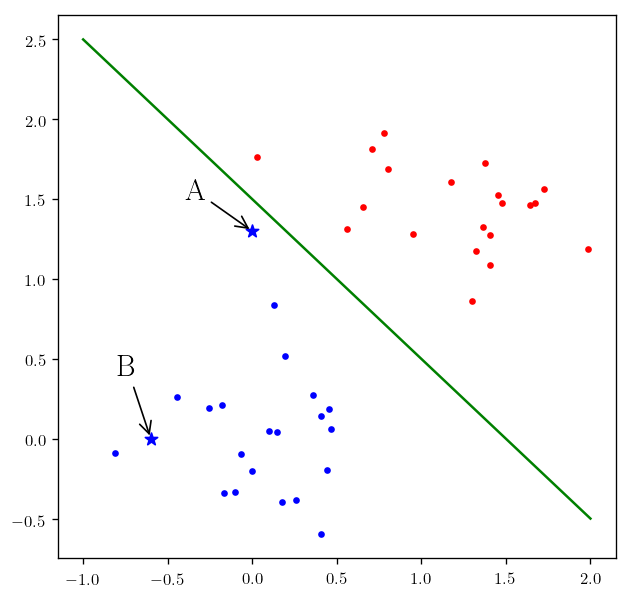

In [51]:
np.random.seed(20)

x1 = 1.2 + 0.5 * np.random.randn(20)
y1 = 1.5 + 0.2 * np.random.randn(20)

x2 = 0 + 0.3 * np.random.randn(20)
y2 = 0 + 0.4 * np.random.randn(20)


plt.plot(x1, y1, "r.")
plt.plot(x2, y2, "b.")

_decision_line = [[-1, 2], [2.5, -0.5]]

plt.plot(_decision_line[0], _decision_line[1], "g")

A_p = [0, 1.3]
B_p = [-0.6, 0]

plt.scatter(A_p[0], A_p[1], c = "b", marker="*", s=60)
plt.scatter(B_p[0], B_p[1], c = "b", marker="*", s=60)


plt.annotate("A", A_p, (A_p[0]-0.4, A_p[1]+0.2), arrowprops={"arrowstyle": "->"})
plt.annotate("B", B_p, (B_p[0]-0.2, B_p[1]+0.4), arrowprops={"arrowstyle": "->"})

plt.show()

For the point $A$ you can see we are very close to the decision boundary, which means that by changing the boundary we are going to change our classification of point $A$ as blue to red. But at the same time if you look at the point $B$ we are pretty certain that our classification should be blue since it is not in the vicinity of the decision boundary or in a more general case of multi-dimension our **separating hyperplane**. So the task is to find a decision boundary that makes our confidence in our classification better.

Now let's look at the following problem. We want to have a linear classifier for a binary classification problem.


$$
\begin{equation*}
z = \sum_{i=1}^n w_i x_i + b = w^T x + b 
\end{equation*}
$$

$$
\begin{equation*}
y = h_{w, b}(x) = g(z) = g(w^T x + b)
\end{equation*}
$$

In which $g$ is defined as and $h_{w,b}$ is our hypothesis function:
$$
\begin{equation*}
g(z) = \begin{cases} 1, & \mbox{if } z \geq 0 \\ -1, & \mbox{if } z < 0 \end{cases}
\end{equation*}
$$

Now we should formalize our qualitative analysis of the closeness to the decision boundary by introducing two concepts:

## Functional Margin:
Imagine that we have a set of training examples $\{(X_j,y_j)\}$, we can define the functional margin of our hypothesis to be:

$$
\begin{equation*}
\zeta_j = z y_j= (w^T x_j + b) y_j
\end{equation*}
$$

So for having a better classification for $y_j=1$ we need the $w^T x_j + b$ to be large value, and for the case of $y_j=-1$ we will seek $w^T x_j + b$ to be a large negative value. So the larger the $\zeta$ is, we expect a larger confidence. Since our $g$ function is only sensitive to sign of $z$, multiplying it by any positive value will not change our decision but will change our Functional margin. So we should make sure that we use a normalized version of $(w,b)$. Also, we define the functional margin of $h_{w,b}$ on the training set $\{(x_j,y_j)\}$ as:

$$
\begin{equation*}
\zeta = \min_{j=1,\dots,n} \zeta_j
\end{equation*}
$$

So basically the worst functional margin among the training set.

## Geometric margin:
We can use geometry to find a reasonable margin and that is to define the margin to be the distance from hyperplane of $S: w^T x + b = 0$ . From this definition the $\vec{w}$ is irtoghonal to the hyperplane and the distance is measure along this vector:

$$
\begin{equation*}
x_{o} = x_j - \zeta_j \frac{\vec{w}}{\|\vec{w}\|}
\end{equation*}
$$

In which $x_o \in S$ which means:
$$
\begin{equation*}
w^T x_0 + b = 0 \\ 
w^T(x_j - \zeta_j \frac{\vec{w}}{\|\vec{w}\|}) + b =0\\
\frac{w^T x_j + b}{\|\vec{w}\|} = \zeta_j
\end{equation*}
$$



And for a more general case of both positive and negative points we can define the geometrical margin to be:
$$
\begin{equation*}
\zeta_j = (\frac{w^T x_j + b}{\|\vec{w}\|}) y_j 
\end{equation*}
$$


This is identical to our functional definition if we take $\|\vec{w}\|=1$. The definition of the margin for the training set is like the functional margin:

$$
\begin{equation*}
\zeta = \min_{j=1,\dots,n} \zeta_j
\end{equation*}
$$

We should try to maximize this $\zeta$ for having a hypothesis parameters that have higher confidence.


Here we have to find the parameters which make $\zeta$ maximum:

$$
\begin{equation*}
\max_{w,b} \zeta \\
(\frac{w^T x_j + b}{\|\vec{w}\|}) y_j \geq \zeta \quad \textrm{ For } j \in \{1, \dots, N\}\\
\|\vec{w}\| = 1
\end{equation*}
$$

We can turned this into another optimization problem:

$$
\begin{equation*}
\max_{w,b} \frac{\zeta}{\|\vec{w}\|} \\
(\frac{w^T x_j + b}{\|\vec{w}\|}) y_j \geq \zeta \quad \textrm{ For } j \in \{1, \dots, N\}
\end{equation*}
$$


As we discussed the $(\vec{w}, b)$ are scalable without changing the results. So, we can conclude that $\zeta$ is scaled as a result. Therefore, we can force $\zeta = 1$.

$$
\begin{equation*}
\max_{w,b} \frac{1}{\|\vec{w}\|} \\
(\frac{w^T x_j + b}{\|\vec{w}\|}) y_j \geq 1 \quad \textrm{ For } j \in \{1, \dots, N\}
\end{equation*}
$$

Notice that none of the above objective function are not convex (In the case of the first one the constraint of $\|\vec{w}\| = 1$ is not convex); which means that our previous method for finding the optimized solution would not work. 

However, we can turn the maximization of $\frac{1}{\|\vec{w}\|}$ to minimization of $\|\vec{w}\|^2$, which is something that we have already know algorithm to optimize.

$$
\begin{equation*}
\max_{w,b} \|\vec{w}\|^2 \\
(\frac{w^T x_j + b}{\|\vec{w}\|}) y_j \geq 1 \quad \textrm{ For } j \in \{1, \dots, N\}
\end{equation*}
$$


Now we have our optimal margin classifier. We can start coding now. But first install the [cvxopt](https://cvxopt.org/) library. And we are going to use two separate algorithm for optimization [Quadratic programming (QP)](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf) and [Sequential minimal optimization (SMO)](https://en.wikipedia.org/wiki/Sequential_minimal_optimization).

In [52]:
import numpy as np

def gaussian_kernel(X1, X2, sigma):
    '''
    INPUT:
    -------
            X1 : shape (N examples, n features)
            X2 : shape (N examples, n features)
            sigma : Parameter for gaussian kernel (rbf)
    OUTPUT:
    -------
            kernel: shape (N examples, N examples)
    '''
    return np.exp((-(np.linalg.norm(X1[None, :, :] - X2[:, None, :], axis=2) ** 2)) / (2 * sigma ** 2))

def linear_kernel(X1, X2, *args):
    '''
    INPUT:
    -------
            X1 : shape (N examples, n features)
            X2 : shape (N examples, n features)

    OUTPUT:
    -------
            kernel: shape (N examples, N examples)
    '''
    return np.tensordot(X2, X1, axes=(1, 1))

In [61]:
import numpy as np
import cvxopt

class SVM:
    """
    This is a very minimal implementation for the Support Vector Machines
    for a binary classifier, which uses two optimization algorithm:

    1. QP : Quadratic programming
    2. SMO : Sequential minimal optimization

    And will find the classifier.
    """

#     penalty =1e-4
    def QP(self, X, y, kernel, penalty):
        # Finding number of examples
        n_examples = X.shape[0]
        # Fidning the outer product of the y with itself (n, 1) to (n,n)
        P = np.outer(y, y) * kernel
        # Creating a matrix of (n,1) with every elemnts to be -1
        q = np.full((n_examples, 1), -1.0)
        # making a matrix of size (2n, n) from the identity matrix
        G = np.vstack((-np.eye(n_examples), np.eye(n_examples)))
        # making a matrix of size (2n, 1)
        h = np.hstack((np.zeros(n_examples), np.full(n_examples, penalty)))
        # reshaping the target feature
        A = y.reshape((1, -1))
        # Starting poisition for b
        b = np.zeros(1)

        # Take a look at the cvxopt documentation_ for more information on
        # why we passed these as it's argument.
        result = cvxopt.solvers.qp(cvxopt.matrix(P),
                                   cvxopt.matrix(q),
                                   cvxopt.matrix(G),
                                   cvxopt.matrix(h),
                                   cvxopt.matrix(A),
                                   cvxopt.matrix(b))

        alpha = np.array(result['x']).ravel()

        supports = np.flatnonzero(np.isclose(alpha, 0) == False)
        self._X_support_vector = X[supports]
        self._y_support_vector = y[supports]
        self._a_support_vector = alpha[supports]

        free_items = np.flatnonzero(self._a_support_vector < penalty)
        y_free = y[free_items]

        self._bias_ = y_free[0] - (self._a_support_vector * self._y_support_vector).T.dot(kernel[supports, free_items[0]])

    def SMO(self, X, y, kernel, penalty, epochs):
        n_examples = X.shape[0]

        alpha = np.zeros(n_examples)
        self._bias_ = 0
        e = -y

        for _ in range(epochs):
            for i in range(n_examples):
                hi = kernel[i].dot(alpha * y) + self._bias_
                if (y[i] * hi < 1 and alpha[i] < penalty) or (y[i] * hi > 1 and alpha[i] > 0):
                    j = np.argmax(np.abs(e - e[i]))

                    if y[i] == y[j]:
                        L = max(0, alpha[i] + alpha[j] - C)
                        H = min(penalty, alpha[i] + alpha[j])
                    else:
                        L = max(0, alpha[j] - alpha[i])
                        H = min(penalty, penalty + alpha[j] - alpha[i])
                    if L == H:
                        continue

                    eta = kernel[i, i] + kernel[j, j] - 2 * kernel[i, j]
                    if eta <= 0:
                        continue

                    alpha_j = alpha[j] + y[j] * (e[i] - e[j]) / eta

                    if alpha_j > H:
                        alpha_j = H
                    elif alpha_j < L:
                        alpha_j = L

                    alpha_i = alpha[i] + y[i] * y[j] * (alpha[j] - alpha_j)

                    bi = self._bias_ - e[i] - y[i] * kernel[i, i] * (alpha_i - alpha[i]) - y[j] * kernel[i, j] * (alpha_j - alpha[j])
                    bj = self._bias_ - e[j] - y[i] * kernel[i, j] * (alpha_i - alpha[i]) - y[j] * kernel[j, j] * (alpha_j - alpha[j])

                    if 0 < alpha_i and alpha_i < penalty:
                        self._bias_ = bi
                    elif 0 < alpha_j and alpha_j < penalty:
                        self._bias_ = bj
                    else:
                        self._bias_ = (bi + bj) / 2

                    alpha[i] = alpha_i
                    alpha[j] = alpha_j

                    e[i] = kernel[i].dot(alpha * y) + self._bias_ - y[i]
                    e[j] = kernel[j].dot(alpha * y) + self._bias_ - y[j]

        supports = np.flatnonzero(alpha > 1e-6)
        self._X_support_vector = X[supports]
        self._y_support_vector = y[supports]
        self._a_support_vector = alpha[supports]

    def fit(self, X, y, kernel_func, penalty, optimization_algorithm, sigma=1, epochs=1):
        '''
        Will fit a classifier to our data set

        INPUT:
        ---------
                X : shape (N examples, n features)
                    Training data
                y : class, shape (N examples,)
                    Target values, 1 or -1
                    
                kernel_func : kernel algorithm
                
                penalty : Penalty parameter of the error term
                
                optimization_algorithm : What algorithm to choose for optimization
                
                sigma : Parameter for Gaussian (rbf) kernel (optional)
                
                epochs : The number of epochs
        '''
        self._sigma_ = sigma
        self.kernel_function = kernel_func

        kernel = self.kernel_function(X, X, self._sigma_)

        if optimization_algorithm == 'QP':
            self.QP(X, y, kernel, penalty)
        elif optimization_algorithm == 'SMO':
            self.SMO(X, y, kernel, penalty, epochs)

    def predict(self, X):
        '''
        Make a prediction based on the fitted model

        INPUT:
        ----------
                X : shape (N examples, n features)
                    Predicting data
        OUTPUT:
        -------
                y : shape (N examples,)
                    Predicted class label per sample, 1 or -1
        '''
        return np.sign(self.score(X))

    def score(self, X):
        '''
        INPUT:
        ----------
                X : shape (N examples, n features)
                    Predicting data
        OUTPUT:
        -------
                y : shape (N examples,)
                    Predicted score of class per sample.
        '''
        kernel = self.kernel_function(X, self._X_support_vector, self._sigma_)
        return (self._a_support_vector * self._y_support_vector).dot(kernel) + self._bias_


In [62]:
def SVM_learner(dataset, kernel_function=linear_kernel, penalty=1e-2, optimization_algorithm="SMO", sigma=1, epochs=0):
    _target = dataset.target_attribute
    _input = dataset.input_attributes
    
    X = np.array(dataset.examples).T[dataset.input_attributes].T
    y = np.array(dataset.examples).T[dataset.target_attribute].T
    svm = SVM()
    svm.fit(X,y, penalty=penalty, optimization_algorithm=optimization_algorithm, kernel_func=kernel_function, sigma=sigma)
    return svm.predict

In [63]:
X1 = np.c_[x1, y1]
X2 = np.c_[x2, y2]

X = np.vstack((X1, X2))
y = np.append(np.full(len(x1),1), np.full(len(x2),-1))

examples = np.zeros((len(x1)+len(x2), 3))

examples[:,:-1] = X
examples[:,-1] = y

In [64]:
mock_data = Data_Set(examples, input_attributes=[0,1], target_attribute=2)

In [65]:
def _plot_svm_(kernel_function=linear_kernel, sigma=1):
    svm_predict = SVM_learner(dataset=mock_data,
                              kernel_function=kernel_function, 
                              optimization_algorithm="SMO",
                              sigma=sigma, epochs=10)

    x = np.linspace(-1, 2.5, 80)
    y = np.linspace(-1, 2.5, 80)


    x, y = np.meshgrid(x, y)

    x = x.ravel()
    y = y.ravel()

    X_testing = np.c_[x, y]

    predictions = svm_predict(X_testing)

    colors = []

    for i in predictions:
        if i==1:
            colors.append("r")
        else:
            colors.append("b")

    np.random.seed(20)

    x1 = 1.2 + 0.5 * np.random.randn(20)
    y1 = 1.5 + 0.2 * np.random.randn(20)

    x2 = 0 + 0.3 * np.random.randn(20)
    y2 = 0 + 0.4 * np.random.randn(20)

    
    fig = plt.scatter(x, y, c=colors, s = 0.5)
    
    plt.plot(x1, y1, "r.", markersize=10)
    plt.plot(x2, y2, "b.", markersize=10)

    return fig


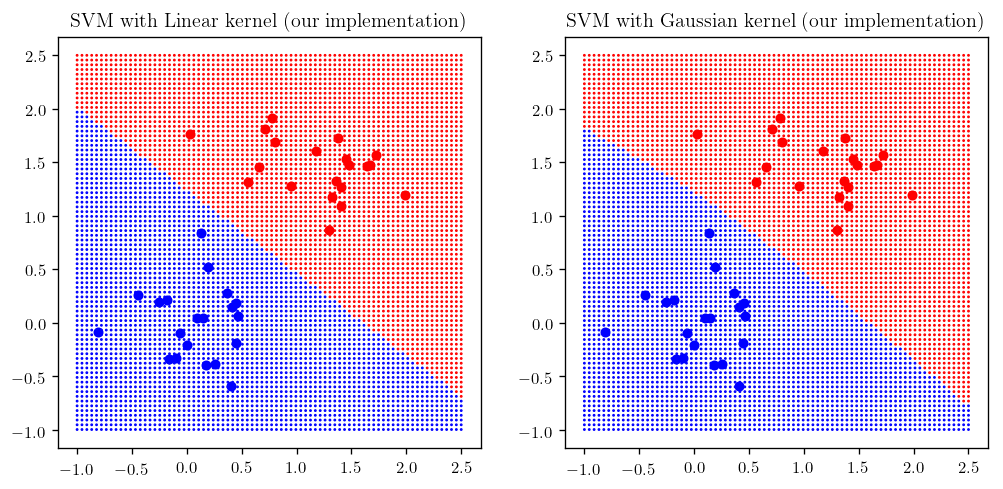

In [66]:
plt.figure(figsize=(10, 10))

plt.subplot(221); _plot_svm_(linear_kernel); plt.title(r"SVM with Linear kernel (our implementation)", fontsize =12)
plt.subplot(222); _plot_svm_(gaussian_kernel, sigma=1); plt.title(r"SVM with Gaussian kernel (our implementation)", fontsize =12)

plt.show()

Let's look at what happens if choose different values of $\sigma$. 

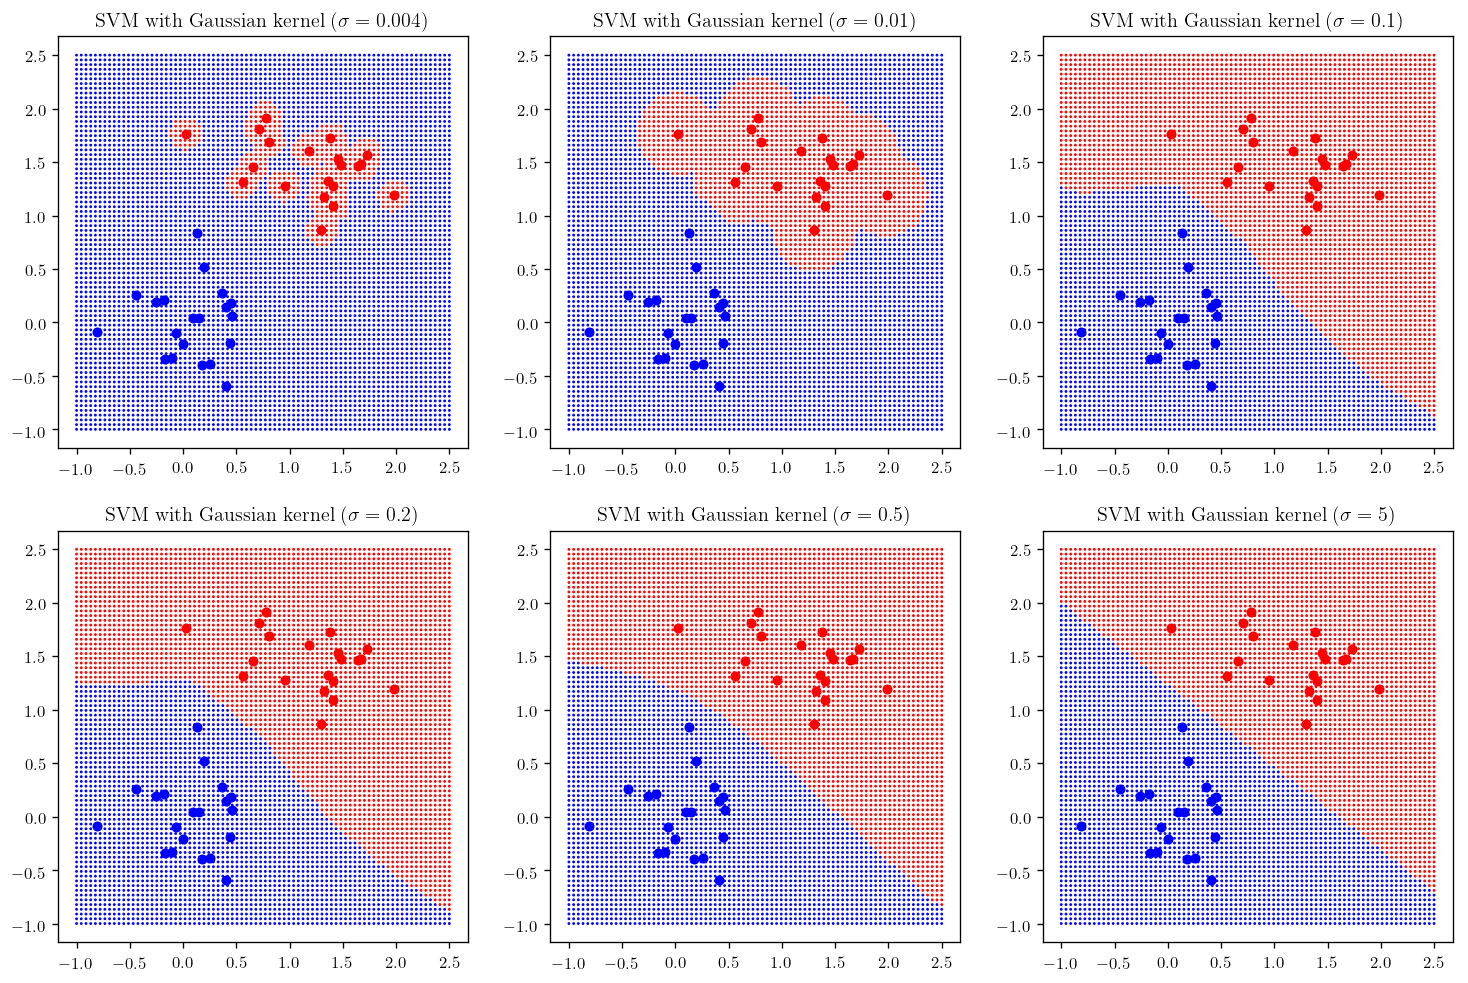

In [67]:
sig = [0.004, 0.01, 0.1, 0.2, 0.5, 5]

plt.figure(figsize=(15, 10))

counter = 231
for sigma in sig:
    plt.subplot(counter); _plot_svm_(gaussian_kernel, sigma=sigma); plt.title(r"SVM with Gaussian kernel ($\sigma= {}$)".format(sigma), fontsize =12)
    counter+=1


Now let's do the same thing this time using `skit-learn` support vector machines:

In [68]:
from sklearn import svm

In [69]:
def _plot_skitlearn_svm(kernel = "linear", gamma=0.1, degree=2, coef=0):
    svm_classifier = svm.SVC(kernel=kernel, gamma=gamma, degree=degree, coef0 = coef)
    X = examples[:,:-1]
    y = examples[:,-1]
    svm_classifier.fit(X, y)
    
    # plot the predictions
    x = np.linspace(-1, 2.5, 80)
    y = np.linspace(-1, 2.5, 80)
    x, y = np.meshgrid(x, y)

    x = x.ravel()
    y = y.ravel()

    X_testing = np.c_[x, y]

    predictions = svm_classifier.predict(X_testing)

    colors = []

    for i in predictions:
        if i==1:
            colors.append("r")
        else:
            colors.append("b")

    np.random.seed(20)

    x1 = 1.2 + 0.5 * np.random.randn(20)
    y1 = 1.5 + 0.2 * np.random.randn(20)

    x2 = 0 + 0.3 * np.random.randn(20)
    y2 = 0 + 0.4 * np.random.randn(20)

    
    fig = plt.scatter(x, y, c=colors, s = 0.5)
    
    plt.plot(x1, y1, "r.", markersize=10)
    plt.plot(x2, y2, "b.", markersize=10)
    return fig

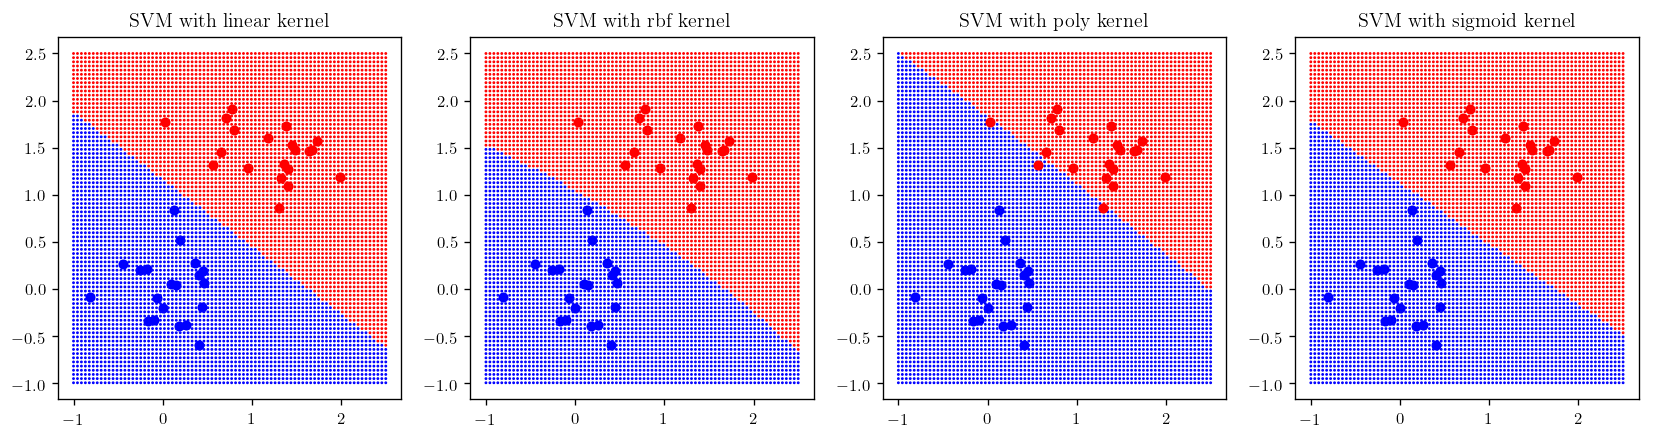

In [70]:
plt.figure(figsize=(17, 4))


kernels = ["linear", "rbf", "poly", "sigmoid"]

counter = 141

for kernel in kernels:
    plt.subplot(counter); _plot_skitlearn_svm(kernel=kernel); plt.title(r"SVM with {} kernel".format(kernel), fontsize =12)
    counter+=1


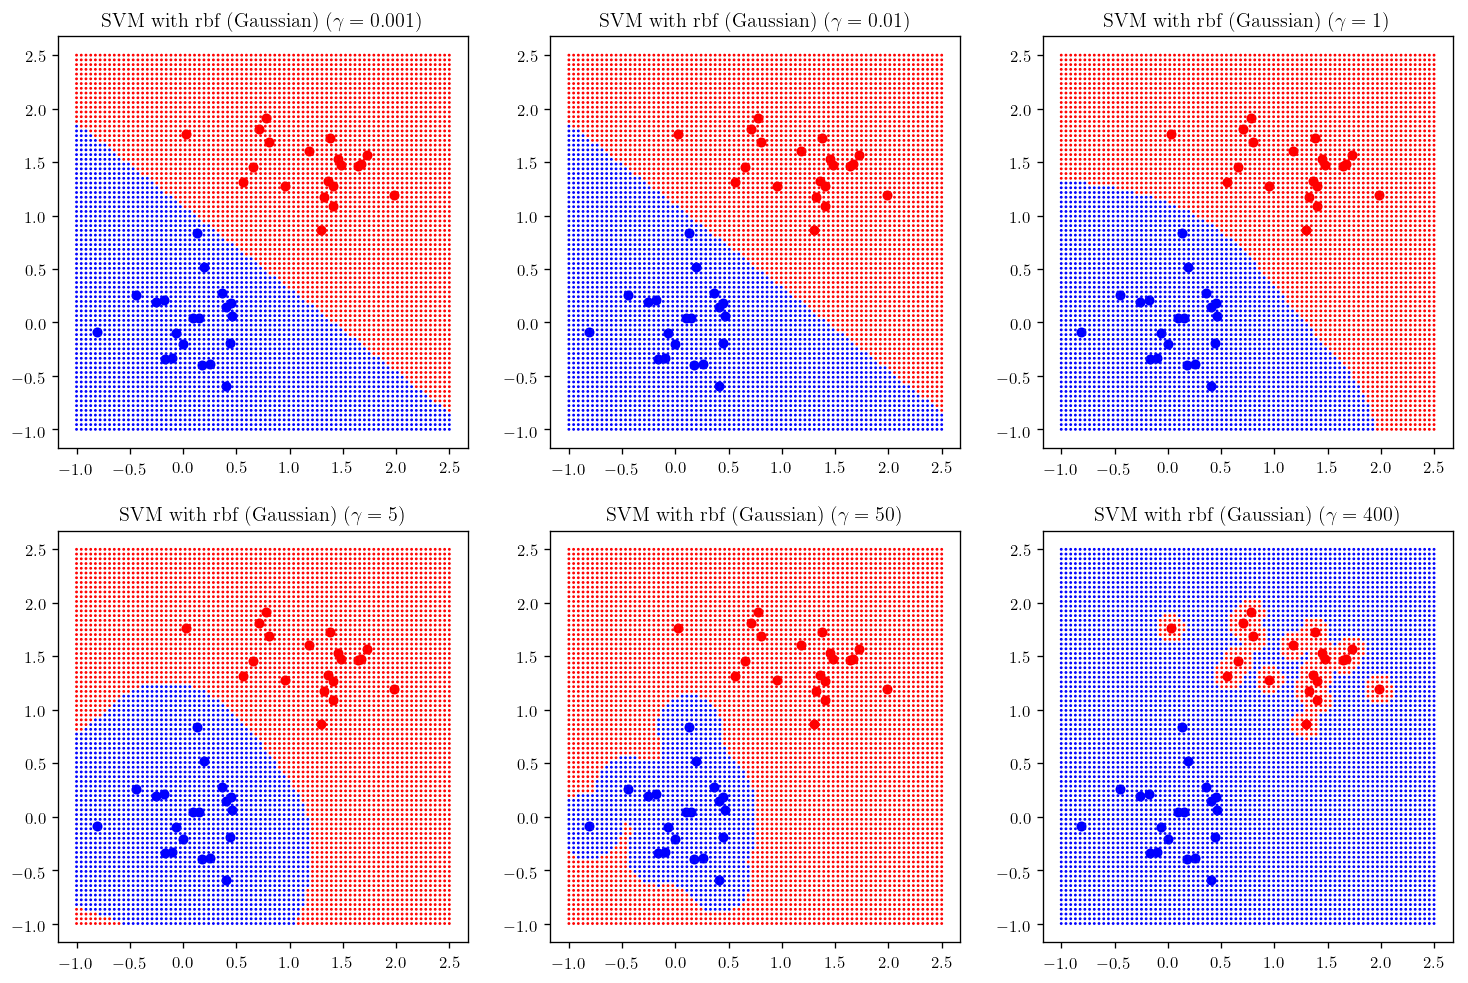

In [71]:
gam = [0.001, 0.01, 1, 5, 50, 400]

plt.figure(figsize=(15, 10))

counter = 231
for gamma in gam:
    plt.subplot(counter); _plot_skitlearn_svm(kernel="rbf", gamma=gamma); plt.title(r"SVM with rbf (Gaussian) ($\gamma= {}$)".format(gamma), fontsize =12)
    counter+=1


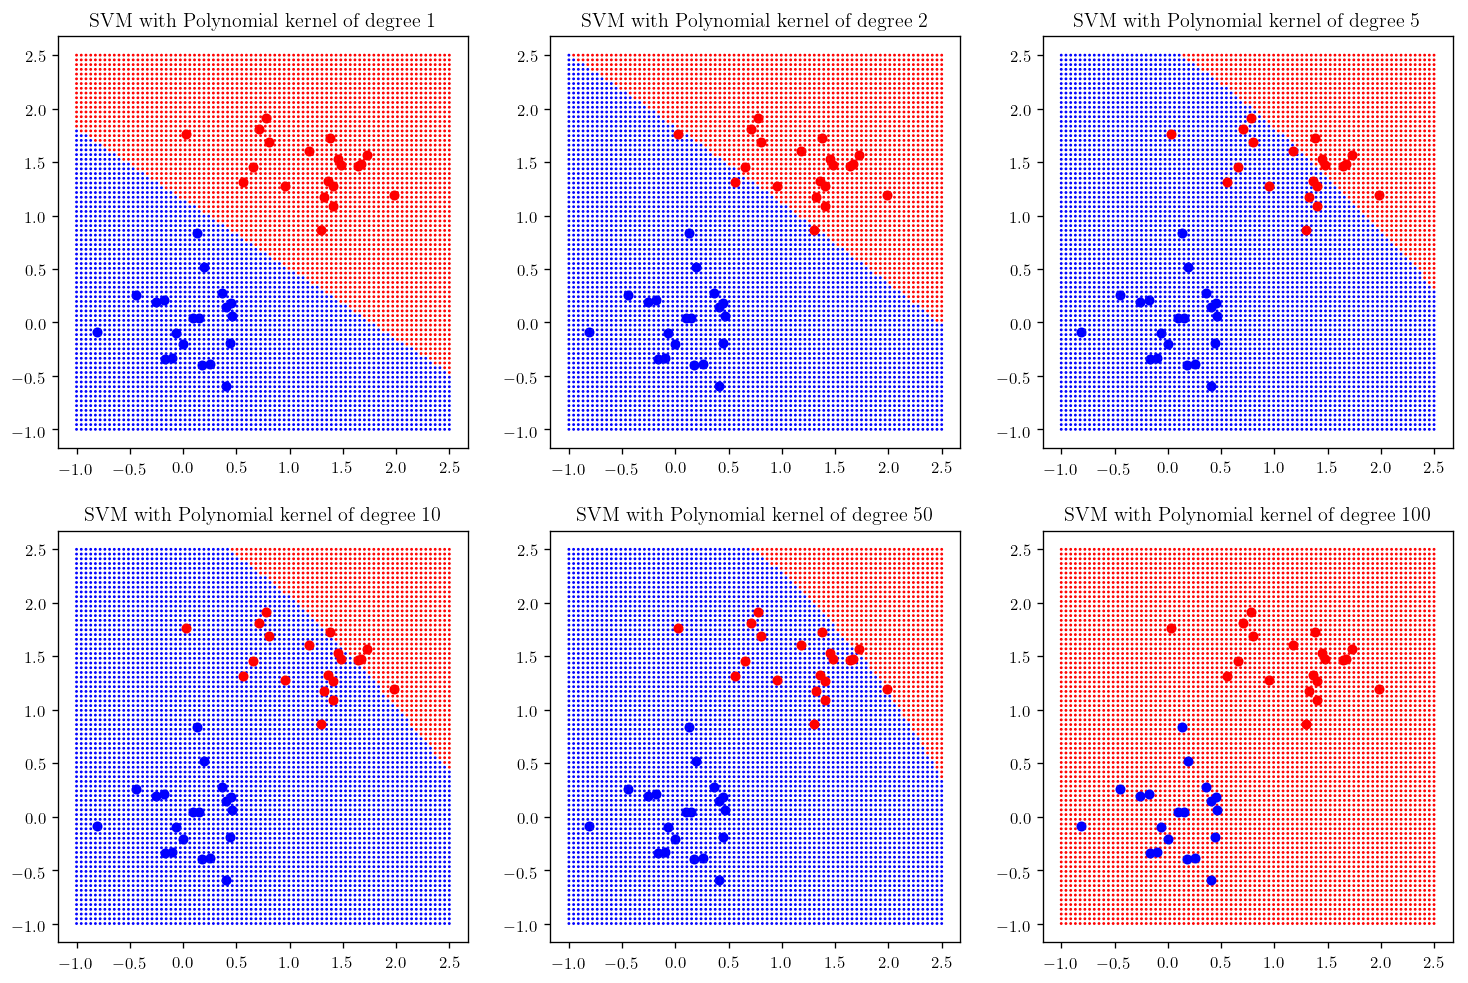

In [72]:
degrees = [1, 2, 5, 10, 50, 100]

plt.figure(figsize=(15, 10))

counter = 231
for d in degrees:
    plt.subplot(counter); _plot_skitlearn_svm(kernel="poly", degree=d); plt.title(r"SVM with Polynomial kernel of degree {}".format(d), fontsize =12)
    counter+=1


As you can see the polynomial fit does not perform well, however if you add the regularization term `coef0` the result will improve:

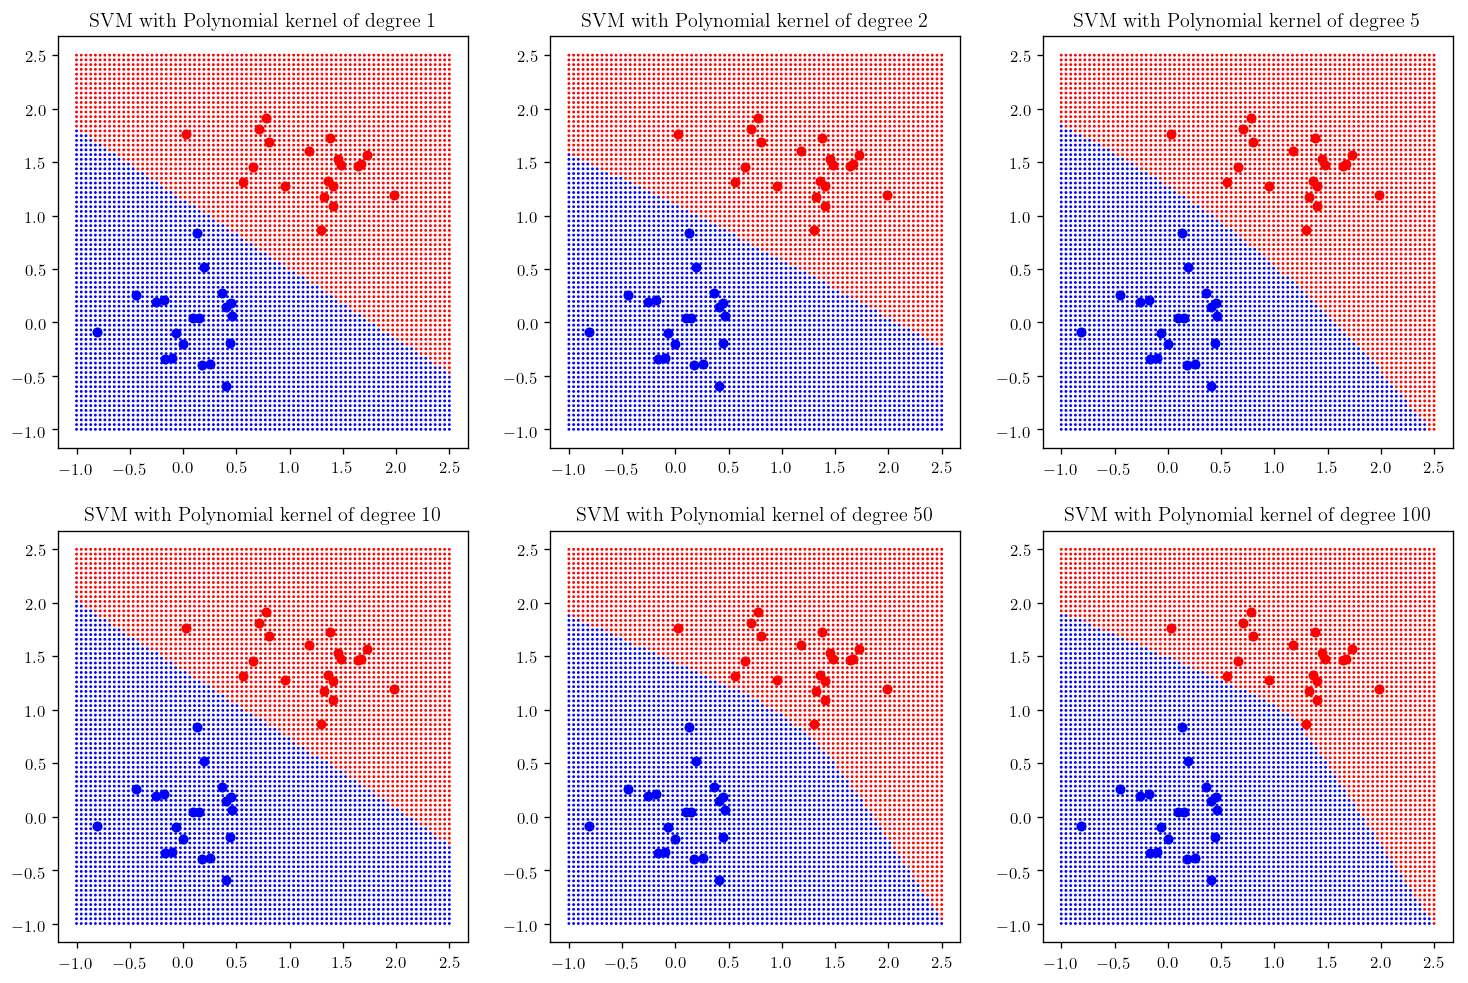

In [73]:
degrees = [1, 2, 5, 10, 50, 100]

plt.figure(figsize=(15, 10))

counter = 231
for d in degrees:
    plt.subplot(counter); _plot_skitlearn_svm(kernel="poly", degree=d, coef=1); plt.title(r"SVM with Polynomial kernel of degree {}".format(d), fontsize =12)
    counter+=1


Our implementation is for a binary classification, but this can be generalized to multi-class classification by running the SVM algorithm on every pair of classes or one pair vs the rest of the classes. Let's look at the iris data set again:

In [74]:
address = "iris.data"
attribute_names = ["sepal-lenght", "sepal-width", "petal-lenght", "petal-width", "class"]
Iris_Data = Data_Set(name = "Iris", target_attribute=4,
                     file_info=(address, 0, ","), attribute_names=attribute_names)


X = np.array(Iris_Data.examples)[:,:-1]
y = np.array(Iris_Data.examples)[:,-1]

X = X.astype(np.float)

In [75]:
colors = []
for i in Iris_Data.examples:
    if i[-1]==Iris_Data.values[-1][0]:
        colors.append("r")
    elif i[-1]==Iris_Data.values[-1][1]:
        colors.append("g")
    else:
        colors.append("b")

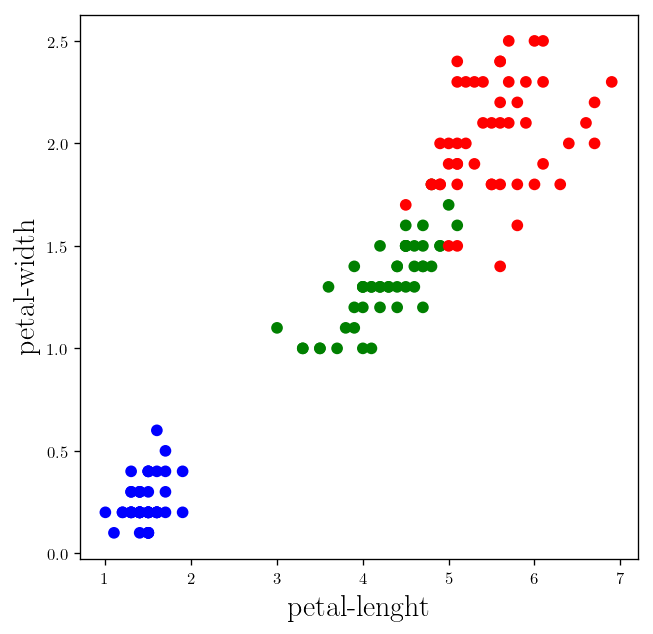

In [76]:
i, j = 2, 3


plt.scatter(X[:,i], X[:,j], c=colors)
plt.xlabel(Iris_Data.attribute_names[i])
plt.ylabel(Iris_Data.attribute_names[j])

plt.show()

In [77]:
def _plot_iris_svm(kernel = "linear", gamma=0.1, degree=2, coef=0):
    X = np.array(Iris_Data.examples)[:,2:-1]
    y_ = np.array(Iris_Data.examples)[:,-1]

    X = X.astype(np.float)

    svm_classifier = svm.SVC(kernel=kernel, 
                             gamma=gamma, 
                             degree=degree,
                             coef0=coef)
    svm_classifier.fit(X,y_)
    
    # plot the predictions
    x = np.linspace(0, 7.5, 80)
    y = np.linspace(0, 3, 80)
    x, y = np.meshgrid(x, y)

    x = x.ravel()
    y = y.ravel()

    X_testing = np.c_[x, y]

    predictions = svm_classifier.predict(X_testing)

    colors_ = []

    for i in predictions:
        if i==Iris_Data.values[-1][0]:
            colors_.append("r")
        elif i==Iris_Data.values[-1][1]:
            colors_.append("g")
        else:
            colors_.append("b")


    fig = plt.scatter(x, y, c=colors_, s = 0.5)

    plt.scatter(X[:,0], X[:, 1], c=colors)
    plt.xlabel(Iris_Data.attribute_names[2])
    plt.ylabel(Iris_Data.attribute_names[3])
    return fig

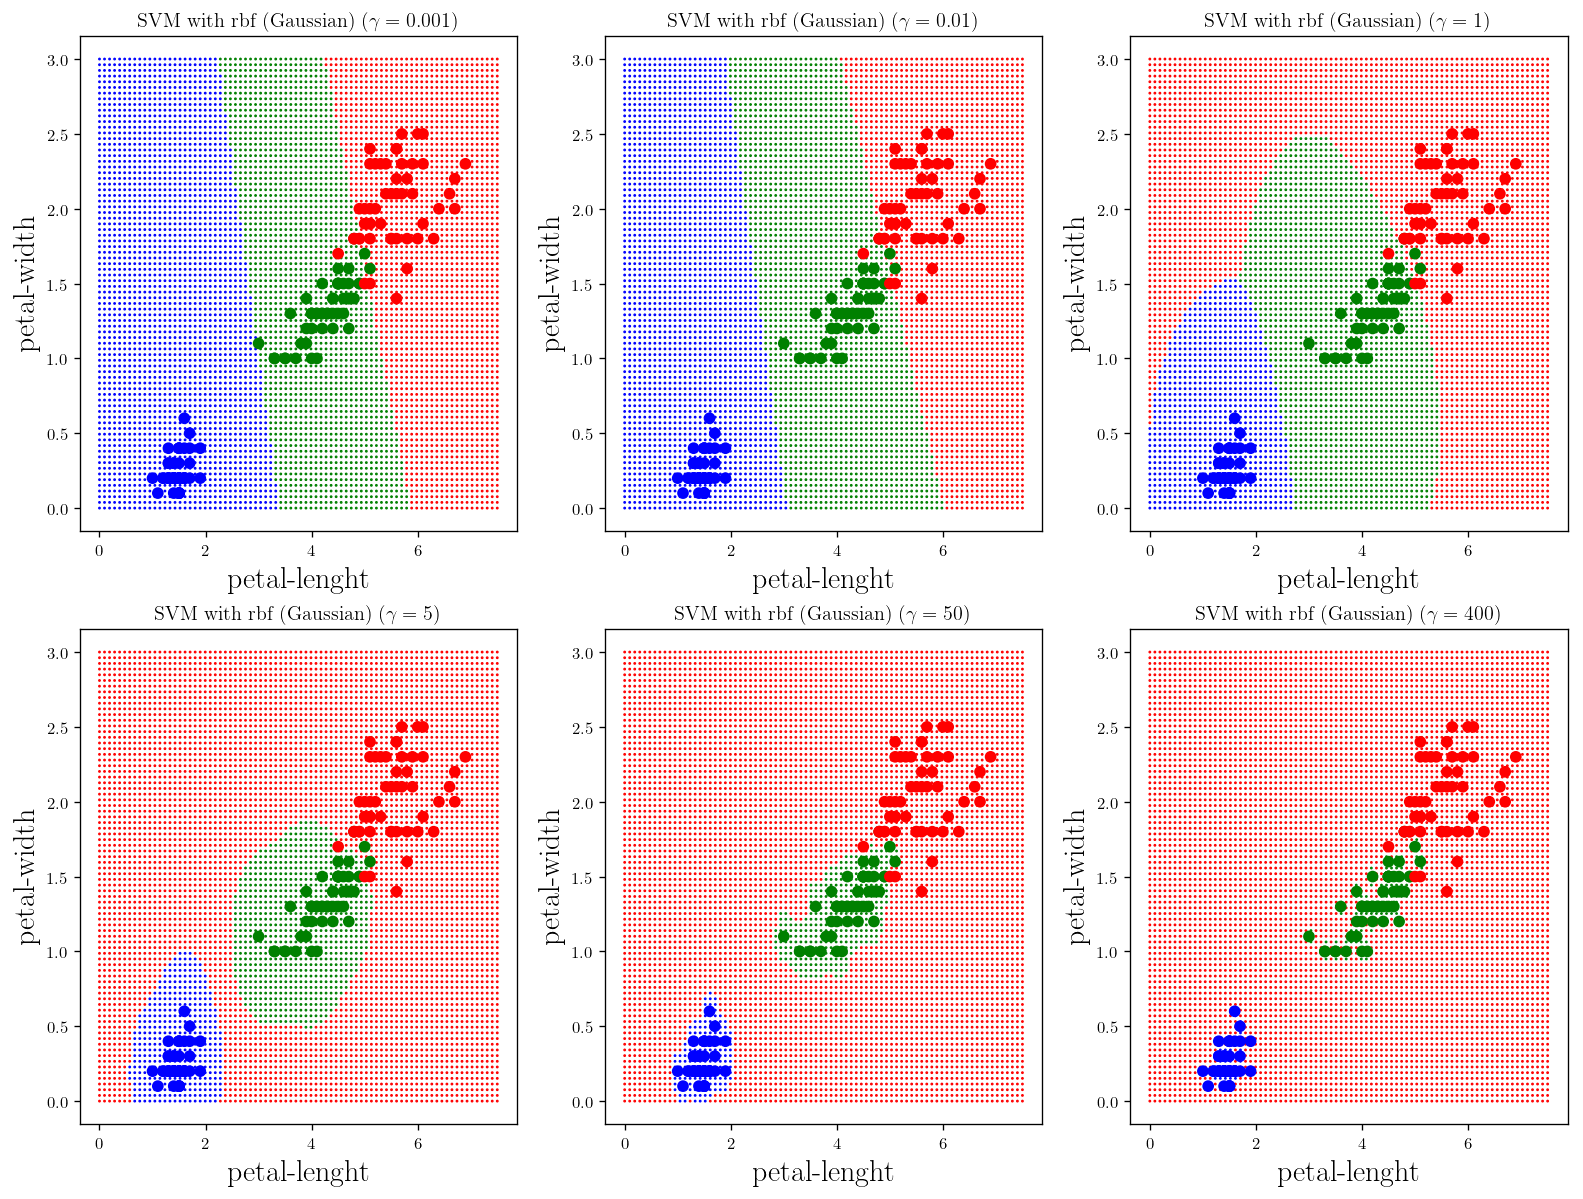

In [78]:
gam = [0.001, 0.01, 1, 5, 50, 400]

plt.figure(figsize=(16, 12))

counter = 231
for gamma in gam:
    plt.subplot(counter); _plot_iris_svm(kernel="rbf", gamma=gamma); plt.title(r"SVM with rbf (Gaussian) ($\gamma= {}$)".format(gamma), fontsize =12)
    counter+=1


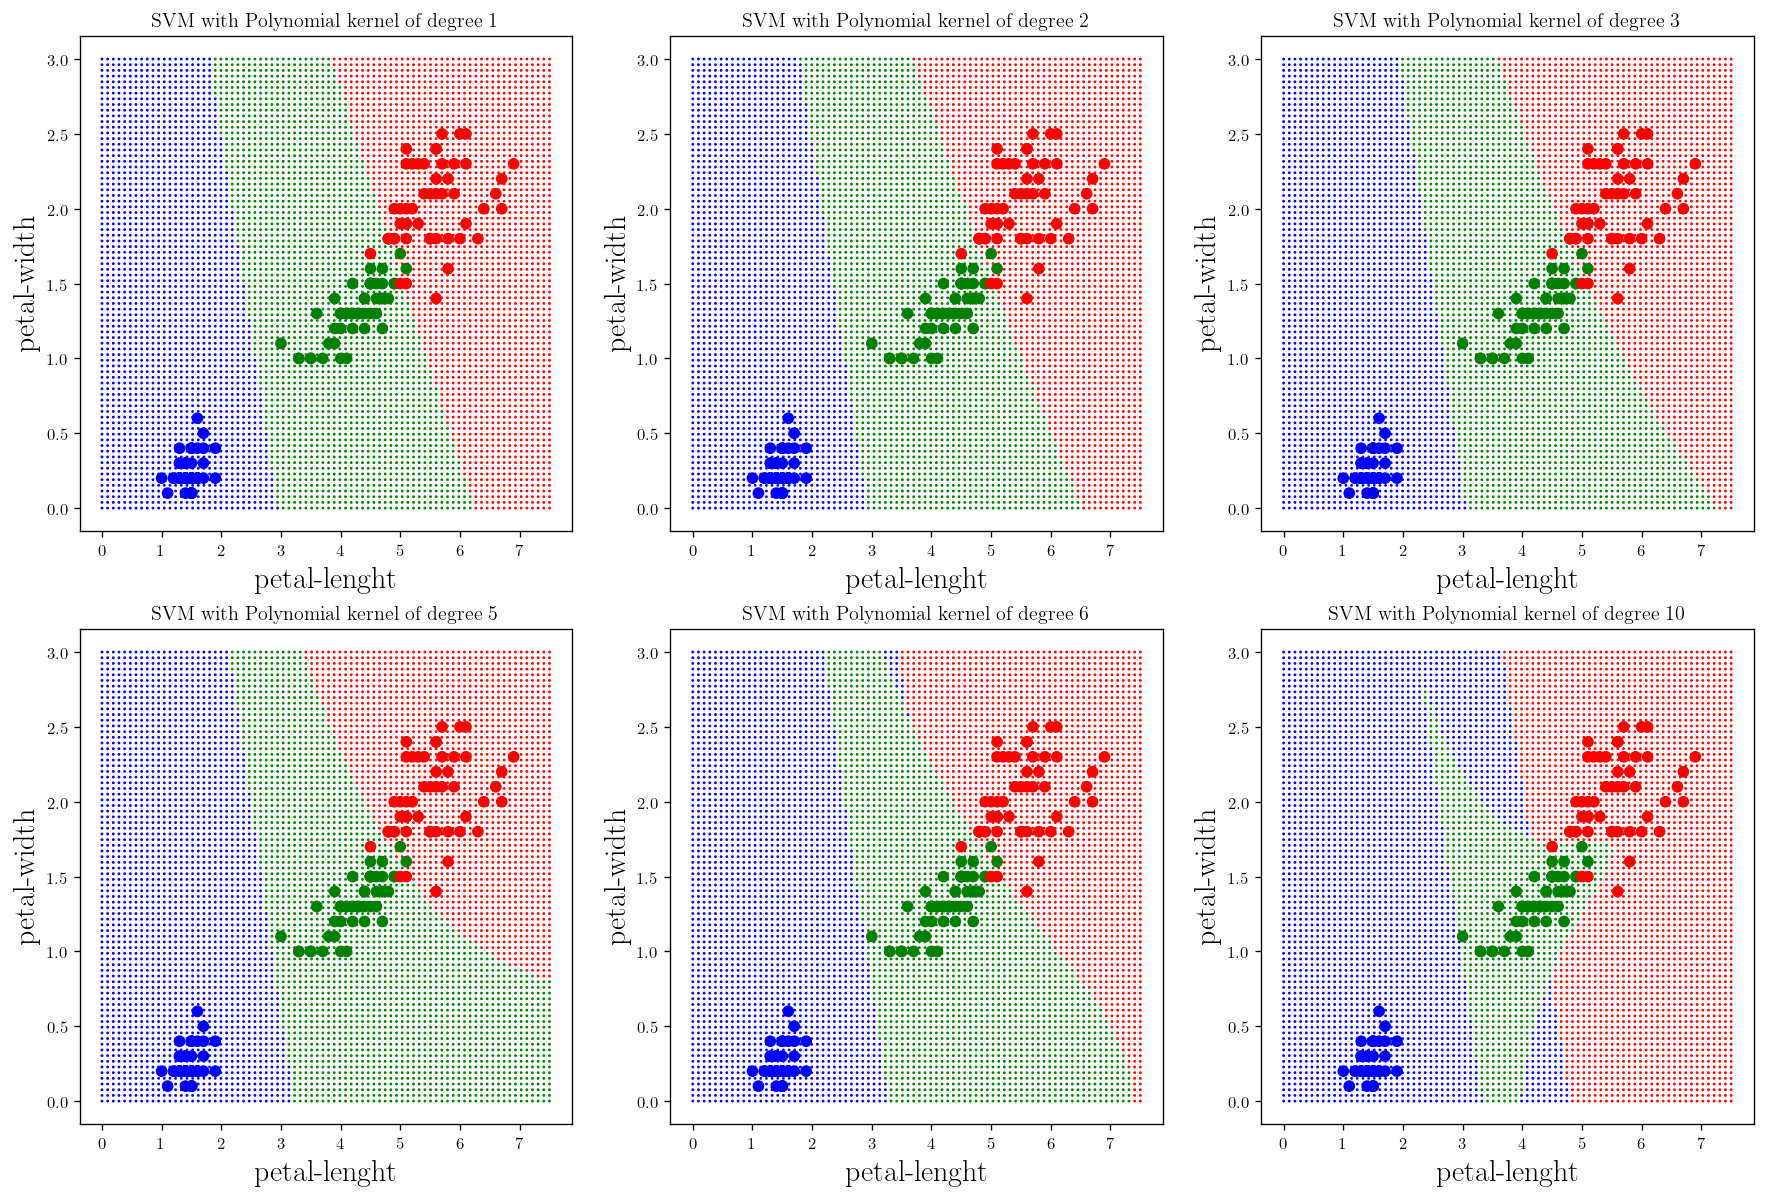

In [79]:
degrees = [1, 2, 3, 5, 6, 10]

plt.figure(figsize=(18, 12))

counter = 231
for d in degrees:
    plt.subplot(counter); _plot_iris_svm(kernel="poly", degree=d); plt.title(r"SVM with Polynomial kernel of degree {}".format(d), fontsize =12)
    counter+=1


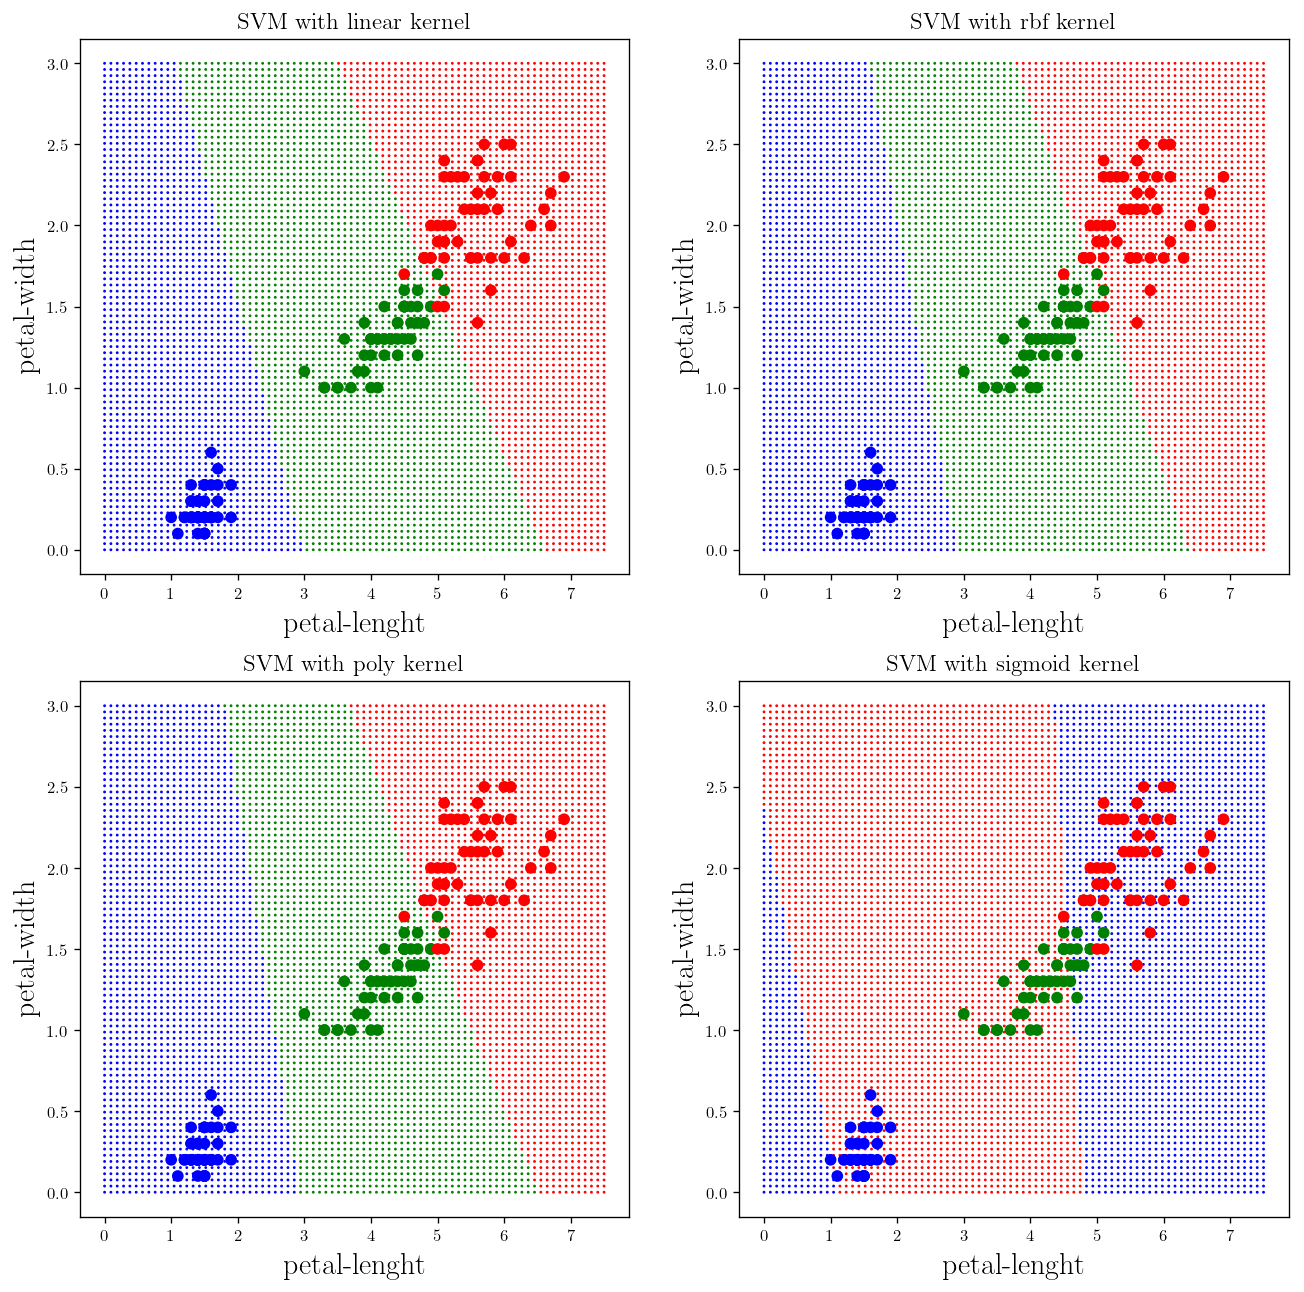

In [80]:
plt.figure(figsize=(13, 13))


kernels = ["linear", "rbf", "poly", "sigmoid"]

counter = 221

for kernel in kernels:
    plt.subplot(counter); _plot_iris_svm(kernel=kernel); plt.title(r"SVM with {} kernel".format(kernel), fontsize =14)
    counter+=1

Now let's take a look at a more interesting problem, now that we have more sophisticated learning algorithm: 

## MNIST handwritten digit database:


In [81]:
# Downloading the dataset
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) 
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int8))

In [7]:
example = mnist["data"][-1].reshape(28, 28)

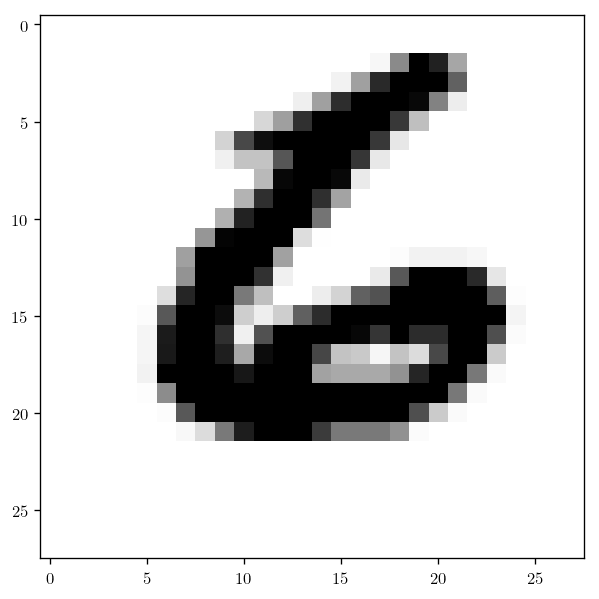

In [8]:
import matplotlib as mpl

plt.imshow(example, cmap=mpl.cm.binary)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

Let's just use the first 5000 data points:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"][:5000], mnist["target"][:5000], test_size=0.2)

In [57]:
svm_clf = svm.SVC(kernel="linear",)

In [58]:
svm_clf.fit(X_train, y_train)

y_prediction = svm_clf.predict(X_test)
print("The accuracy of the predictions on the test set is =", Measure_accuracy(y_test, y_prediction))

The accuracy of the predictions on the test set is = 0.923


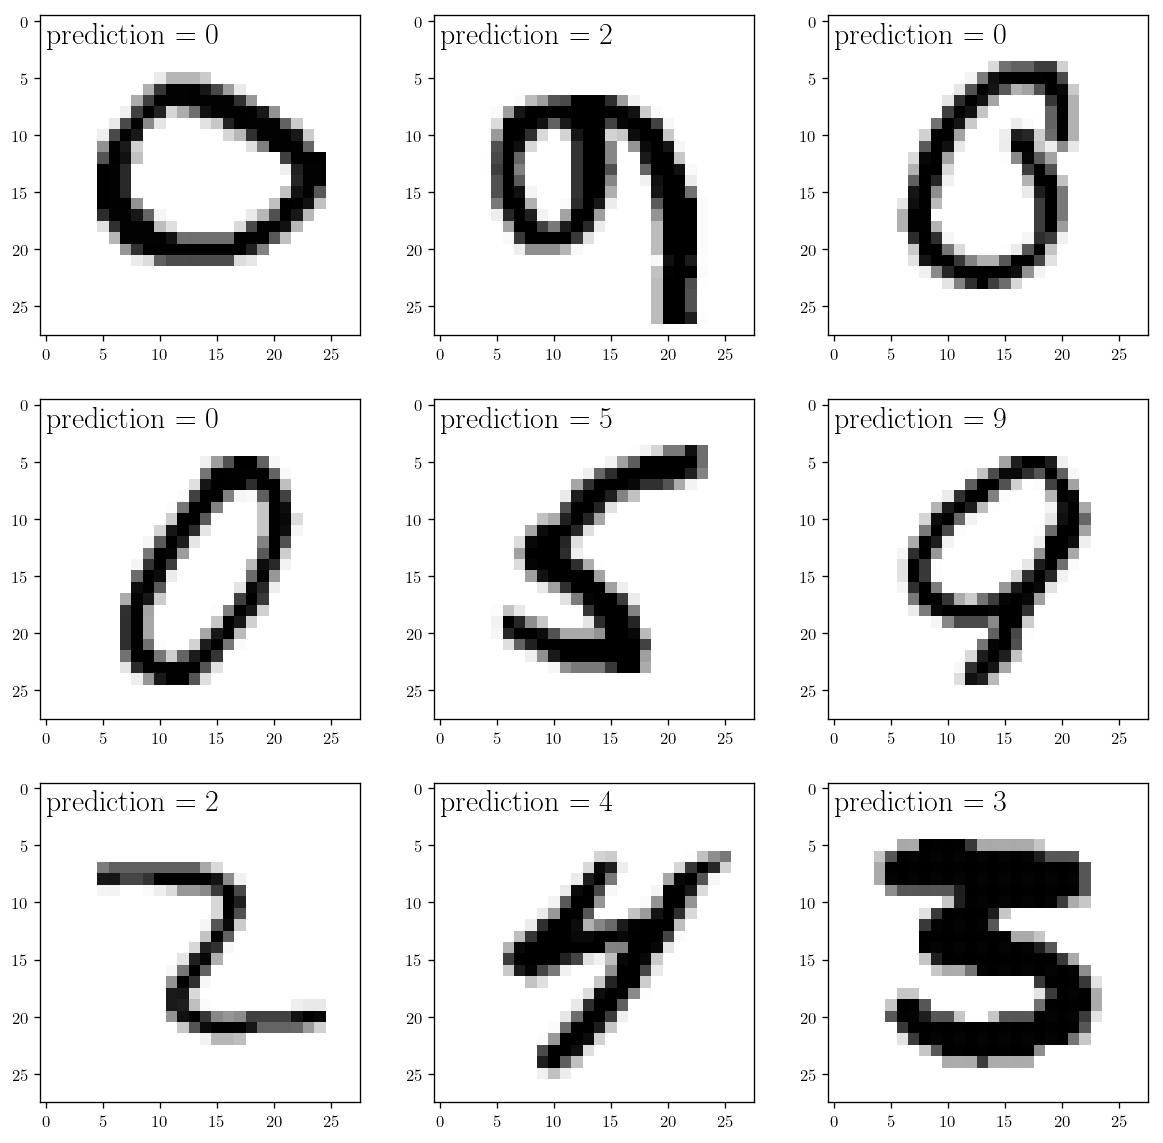

In [60]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()

In [72]:
svm_clf = svm.SVC(kernel="poly",
                  gamma=0.01,
                  degree=3,)

svm_clf.fit(X_train, y_train)



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [73]:
y_prediction = svm_clf.predict(X_test)
print("The accuracy of the predictions on the test set is =", Measure_accuracy(y_test, y_prediction))

The accuracy of the predictions on the test set is = 0.943


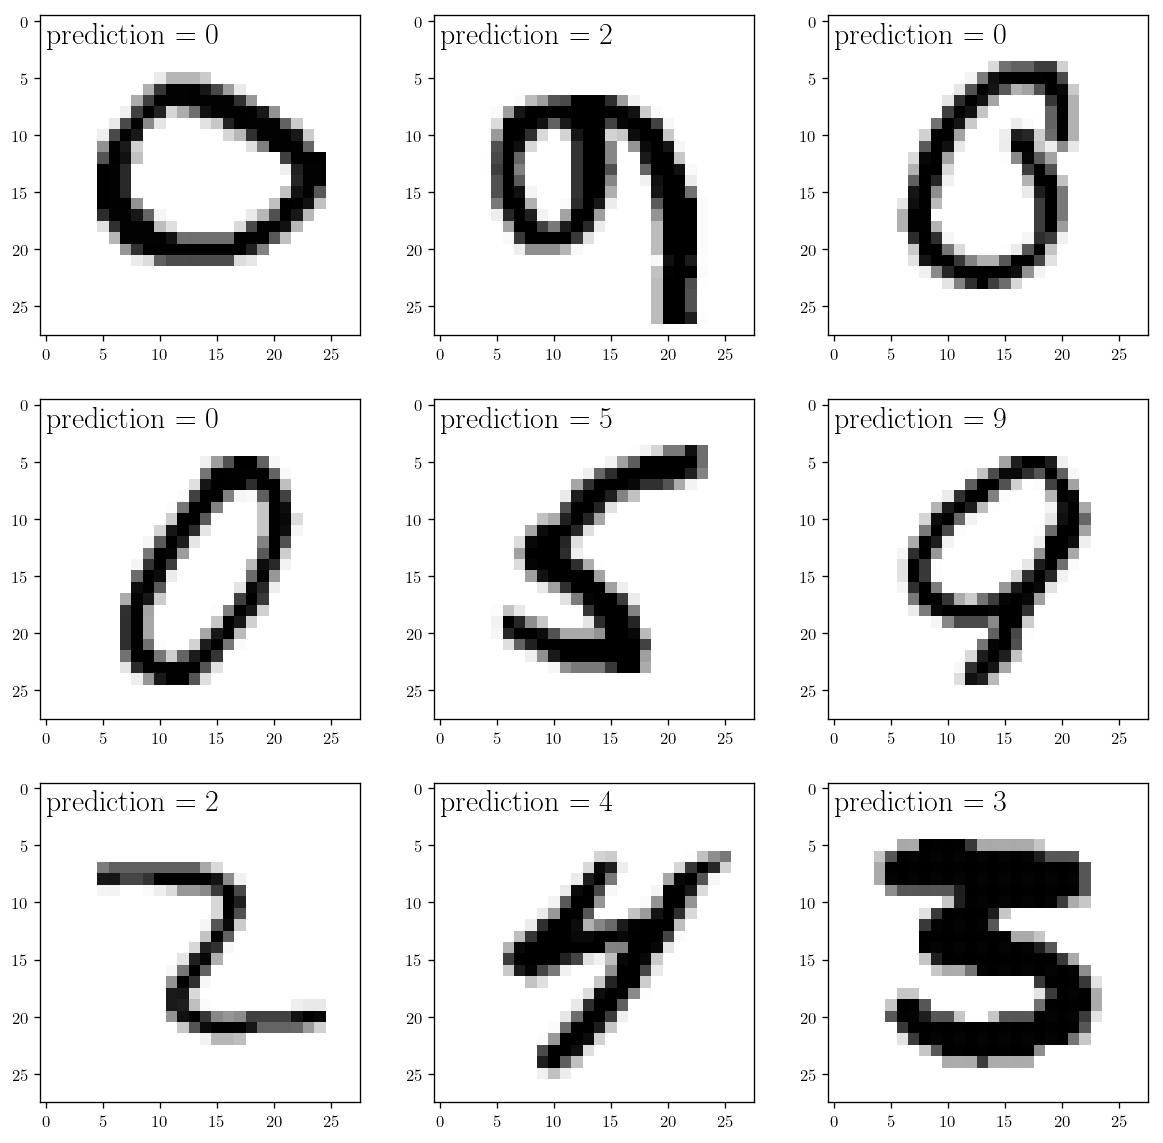

In [74]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(0,9):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()

In [10]:
svm_clf = svm.SVC(kernel="poly",
                  gamma=0.1,
                  degree=3,
                  coef0=1)

svm_clf.fit(X_train, y_train)

y_prediction = svm_clf.predict(X_test)
print("The accuracy of the predictions on the test set is =", Measure_accuracy(y_test, y_prediction))

The accuracy of the predictions on the test set is = 0.946


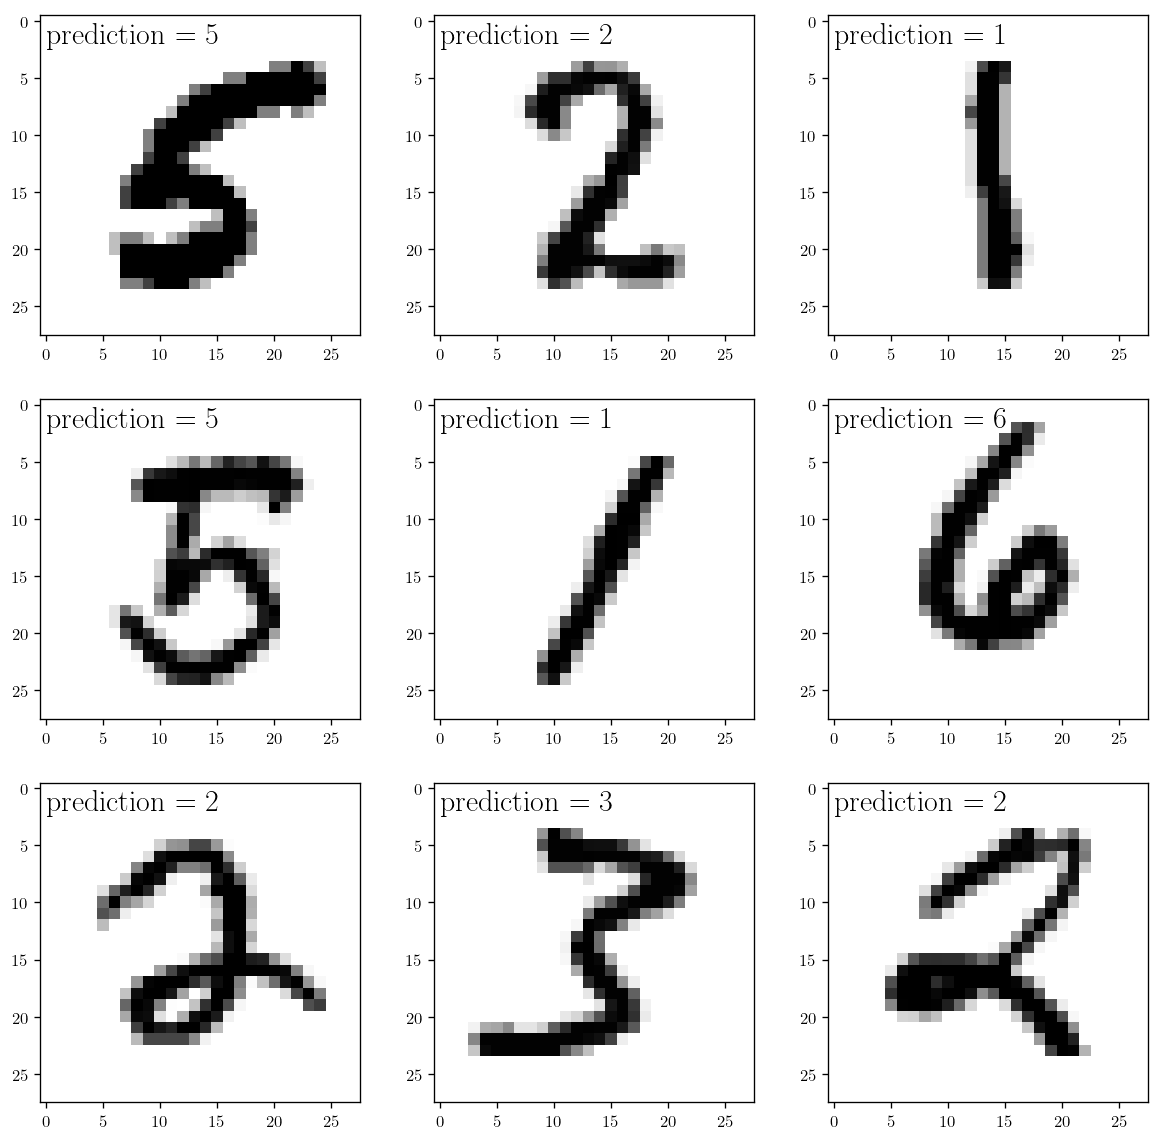

In [11]:
import matplotlib as mpl
plt.figure(figsize=(12, 12))

j = 331
for i in range(20,29):
    example = X_test[i].reshape(28, 28)
    plt.subplot(j); plt.imshow(example, cmap=mpl.cm.binary)
    plt.text(0, 2, "prediction = {}".format(y_prediction[i]))
    j+=1

plt.show()